<a href="https://colab.research.google.com/github/D0mP3dr0/geoprocessing_gnn/blob/main/geoprocessing_gnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CRIACAO DO GRAFO INTRACAMADA

In [39]:
# prompt: me de o comando para carregar o drive

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


📓 1_Configuracao_Ambiente/

In [ ]:
# Verificar o tipo de GPU disponível
!nvidia-smi

Sun Apr 13 20:35:53 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA L4                      Off |   00000000:00:03.0 Off |                    0 |
| N/A   39C    P8             11W /   72W |       0MiB /  23034MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
# Verificar a versão do Python e ambiente atual
import sys
print(f"Versão do Python: {sys.version}")
!pip --version

Versão do Python: 3.11.12 (main, Apr  9 2025, 08:55:54) [GCC 11.4.0]
pip 24.1.2 from /usr/local/lib/python3.11/dist-packages/pip (python 3.11)


In [ ]:
# Instalação de bibliotecas essenciais para processamento geoespacial
!pip install -U geopandas rasterio pyproj shapely fiona rtree pycrs mapclassify pyogrio
!pip install -U osmnx networkx folium keplergl
!pip install -U rasterstats xarray rioxarray netCDF4
!pip install -U scipy scikit-learn statsmodels plotly matplotlib seaborn
!pip install -U tqdm jupyterlab notebook ipywidgets
!pip install -U pygeos contextily pysal momepy
!pip install -U psycopg2-binary sqlalchemy geoalchemy2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 96.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 100.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 541.1/541.1 kB 43.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 5.8 MB/s eta 0:00:00
  Created wheel for pycrs: filename=PyCRS-1.0.2-py3-none-any.whl size=32686 sha256=fba5d2566f08a883db1bf559016854e4263800ee89988169e4cbebb40fd708fc
  Stored in directory: /root/.cache/pip/wheels/5f/ad/a3/183ed754d7698fc15a2eb153705e05d05a0d97f3331293ce48
Successfully built pycrs
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.4/18.4 MB 102.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached ipywidgets-8.1.6-py3-none-any.whl.metadata (2.4 kB

In [ ]:
# Instalação das bibliotecas RAPIDS para processamento acelerado por GPU
# O L4 é compatível com RAPIDS, que acelera significativamente operações geoespaciais
!pip install -U cudf cuml cuspatial cupy

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 73.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for cudf
  Running setup.py clean for cudf
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for cuml
  Running setup.py clean for cuml
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for outpu

In [40]:
# Bibliotecas específicas para manipulação de dados tabulares e leitura de arquivos
!pip install -U pandas numpy openpyxl xlrd xlwt xlsxwriter
!pip install -U pyshp geojson topojson geobuf mapbox-vector-tile
!pip install -U geoviews holoviews datashader panel hvplot
!pip install -U dask distributed h5py hdf5 zarr

  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires notebook==6.5.7, but you have notebook 7.4.0 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.
  Using cached numpy-2.0.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
Usin

In [41]:
# Verificar importações essenciais e configurações básicas
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import rasterio
import networkx as nx

print("Verificação de configuração básica concluída. Bibliotecas principais carregadas com sucesso.")

Verificação de configuração básica concluída. Bibliotecas principais carregadas com sucesso.


In [42]:
# Configurar ambiente para trabalhar com o L4 GPU
import os

# Definir variáveis de ambiente para otimização de bibliotecas geoespaciais
os.environ['USE_PYGEOS'] = '0'  # Usar GeoPandas com GEOS (mais estável)
os.environ['CUDA_VISIBLE_DEVICES'] = '0'  # Utilizar GPU 0

# Configurações para utilizar memória de GPU de forma eficiente
os.environ['RAPIDS_NO_INITIALIZE'] = '1'  # Inicialização manual do RAPIDS

print("Variáveis de ambiente configuradas para otimização com GPU L4")

Variáveis de ambiente configuradas para otimização com GPU L4


In [43]:
# Configuração para visualização interativa
from IPython.display import display, HTML

# Aumentar limite de exibição para melhor visualização de dados geoespaciais
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

# Configurar matplotlib para visualizações de alta qualidade
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['figure.dpi'] = 100

print("Configurações de visualização otimizadas")

Configurações de visualização otimizadas


In [44]:
# Função utilitária para verificar consumo de memória
def check_memory_usage():
    """Exibe o uso atual de memória RAM e GPU."""
    print("Uso de memória RAM:")
    !free -h

    print("\nUso de memória GPU:")
    !nvidia-smi --query-gpu=memory.used,memory.total --format=csv

check_memory_usage()

Uso de memória RAM:
               total        used        free      shared  buff/cache   available
Mem:            52Gi       1.5Gi        38Gi        24Mi        13Gi        50Gi
Swap:             0B          0B          0B

Uso de memória GPU:
memory.used [MiB], memory.total [MiB]
0 MiB, 23034 MiB


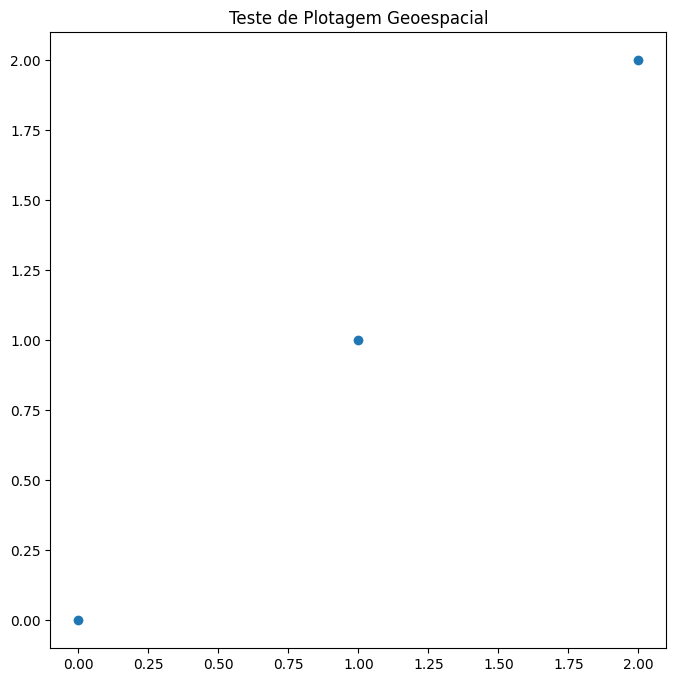

Teste de funcionalidade geoespacial concluído com sucesso!


In [45]:
# Testar leitura básica de dados geoespaciais
try:
    # Criar um GeoDataFrame simples para teste
    from shapely.geometry import Point

    # Criar alguns pontos de teste
    geometry = [Point(0, 0), Point(1, 1), Point(2, 2)]
    gdf = gpd.GeoDataFrame(geometry=geometry)

    # Plotar para verificar funcionamento
    gdf.plot()
    plt.title("Teste de Plotagem Geoespacial")
    plt.show()

    print("Teste de funcionalidade geoespacial concluído com sucesso!")
except Exception as e:
    print(f"Erro ao testar funcionalidade geoespacial: {e}")

In [46]:
# Resumo da configuração do ambiente
print("="*80)
print("CONFIGURAÇÃO DO AMBIENTE CONCLUÍDA COM SUCESSO")
print("="*80)
print("\nBibliotecas instaladas e configuradas:")
print("- Processamento geoespacial: GeoPandas, Rasterio, Shapely, Fiona")
print("- Análise de redes: NetworkX, OSMnx")
print("- Processamento de dados: Pandas, NumPy, SciPy, Scikit-learn")
print("- Visualização: Matplotlib, Folium, Plotly, Kepler.gl")
print("- Aceleração GPU: RAPIDS (cuDF, cuSpatial)")
print("\nPróximos passos:")
print("1. Execute 1.2_Carregamento_Datasets.ipynb para carregar os dados")
print("2. Execute 1.3_Configuracao_Sistema_Coordenadas.ipynb para configurar os sistemas de referência")
print("="*80)

CONFIGURAÇÃO DO AMBIENTE CONCLUÍDA COM SUCESSO

Bibliotecas instaladas e configuradas:
- Processamento geoespacial: GeoPandas, Rasterio, Shapely, Fiona
- Análise de redes: NetworkX, OSMnx
- Processamento de dados: Pandas, NumPy, SciPy, Scikit-learn
- Visualização: Matplotlib, Folium, Plotly, Kepler.gl
- Aceleração GPU: RAPIDS (cuDF, cuSpatial)

Próximos passos:
1. Execute 1.2_Carregamento_Datasets.ipynb para carregar os dados
2. Execute 1.3_Configuracao_Sistema_Coordenadas.ipynb para configurar os sistemas de referência


1.2_Carregamento_Datasets.ipynb

In [ ]:
# Carregamento de Datasets para Integração Geoespacial
# Este notebook carrega os datasets GPKG necessários para o projeto

import os
import glob
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import json
from shapely.geometry import box

# Montando o Google Drive para acessar os dados
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
# Definição do diretório onde estão os datasets
data_dir = '/content/drive/MyDrive/geoprocessamento_gnn/DATA'

# Verificando se o diretório existe
if not os.path.exists(data_dir):
    raise FileNotFoundError(f"O diretório {data_dir} não foi encontrado. Verifique o caminho.")

print(f"Diretório de dados encontrado: {data_dir}")

Diretório de dados encontrado: /content/drive/MyDrive/geoprocessamento_gnn/DATA


In [49]:
# Listando todos os arquivos GPKG no diretório de dados
gpkg_files = glob.glob(os.path.join(data_dir, "*.gpkg"))
print(f"Encontrados {len(gpkg_files)} arquivos GPKG:")
for i, file in enumerate(gpkg_files):
    print(f"{i+1}. {os.path.basename(file)}")

if len(gpkg_files) == 0:
    print("Nenhum arquivo GPKG encontrado. Verifique o caminho ou extensão dos arquivos.")

Encontrados 9 arquivos GPKG:
1. inmet_processed.gpkg
2. setores_censitarios_enriched.gpkg
3. hidrografia_enriched_20250412_233008.gpkg
4. buildings_enriched_20250413_131208.gpkg
5. railways_enriched_20250413_134853.gpkg
6. natural_areas_enriched_20250413_144444.gpkg
7. roads_enriched_20250412_230707.gpkg
8. landuse_enriched_20250413_105344.gpkg
9. rbs_enriched_20250413_153946.gpkg


In [51]:
# Using the default path
explore_gpkg()

# Specifying a different path if needed
explore_gpkg('/content/drive/MyDrive/geoprocessamento_gnn/DATA')

TypeError: explore_gpkg() missing 1 required positional argument: 'gpkg_path'

In [55]:
#def explore_gpkg(gpkg_path='/content/drive/MyDrive/geoprocessamento_gnn/DATA'):
    # Listar todas as camadas no arquivo
    layers = fiona.listlayers(gpkg_path)

    # Coletar informações sobre cada camada
    layer_info = []
    for layer in layers:
        try:
            # Abrir a camada para obter informações
            with fiona.open(gpkg_path, layer=layer) as src:
                # Obter a contagem de feições
                count = len(src)
                # Obter o tipo de geometria
                if count > 0:
                    geometry_type = src.schema['geometry']
                else:
                    geometry_type = "Desconhecido"
                # Obter o CRS
                crs = src.crs
                # Obter os campos de atributos
                fields = list(src.schema['properties'].keys())

                layer_info.append({
                    'Layer': layer,
                    'Feature Count': count,
                    'Geometry Type': geometry_type,
                    'CRS': crs,
                    'Fields': fields[:5] + ['...'] if len(fields) > 5 else fields
                })
        except Exception as e:
            print(f"Erro ao processar camada {layer}: {e}")
            layer_info.append({
                'Layer': layer,
                'Error': str(e)
            })

    return pd.DataFrame(layer_info)

# Importamos fiona aqui para listar as camadas
import fiona

# Explorando cada arquivo GPKG
for gpkg_file in gpkg_files:
    file_name = os.path.basename(gpkg_file)
    print(f"\n{'='*80}\nExplorando arquivo: {file_name}\n{'='*80}")

    layers_info = explore_gpkg(gpkg_file)
    display(layers_info)

IndentationError: unexpected indent (<ipython-input-55-3114e8a9e133>, line 3)

In [ ]:
# Função para carregar e armazenar todos os datasets em um dicionário
def load_all_datasets(gpkg_files):
    """
    Carrega todos os arquivos GPKG e suas camadas em um dicionário.

    Args:
        gpkg_files: Lista de caminhos para arquivos GPKG

    Returns:
        Um dicionário de GeoDataFrames organizados por nome de arquivo e camada
    """
    datasets = {}

    for gpkg_file in tqdm(gpkg_files, desc="Carregando arquivos GPKG"):
        file_name = os.path.basename(gpkg_file)
        datasets[file_name] = {}

        # Listar camadas
        layers = fiona.listlayers(gpkg_file)

        for layer in tqdm(layers, desc=f"Camadas em {file_name}", leave=False):
            try:
                # Carregar o GeoDataFrame
                gdf = gpd.read_file(gpkg_file, layer=layer)

                # Armazenar no dicionário
                datasets[file_name][layer] = gdf

                print(f"Carregado: {file_name} - {layer} - {len(gdf)} registros")
            except Exception as e:
                print(f"Erro ao carregar camada {layer} de {file_name}: {e}")

    return datasets

# Carregando todos os datasets
datasets = load_all_datasets(gpkg_files)

# Salvando em uma variável global para acesso posterior
import builtins
builtins.datasets = datasets

print("\nCarregamento completo. Todos os datasets estão armazenados na variável global 'datasets'.")

Carregando arquivos GPKG:   0%|          | 0/9 [00:00<?, ?it/s]

Camadas em inmet_processed.gpkg:   0%|          | 0/1 [00:00<?, ?it/s]

Carregado: inmet_processed.gpkg - inmet_processed - 8784 registros


DriverError: Failed to open dataset (flags=68): /content/drive/MyDrive/geoprocessamento_gnn/DATA/setores_censitarios_enriched.gpkg

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

Support for third party widgets will remain active for the duration of the session. To disable support:

In [ ]:
from google.colab import output
output.disable_custom_widget_manager()

In [ ]:
# Função para visualizar a extensão geográfica de todos os datasets em um mapa
def plot_dataset_extents(datasets):
    """
    Visualiza a extensão geográfica de todos os datasets carregados.

    Args:
        datasets: Dicionário de datasets carregados
    """
    # Criar um gráfico vazio
    fig, ax = plt.subplots(1, 1, figsize=(15, 15))

    # Cores para diferentes datasets
    colors = plt.cm.tab20.colors
    color_idx = 0

    # Legenda
    legend_items = []

    # Iterar através dos datasets
    for file_name, layers in datasets.items():
        for layer_name, gdf in layers.items():
            # Verificar se o GeoDataFrame tem geometria
            if gdf.geometry.is_empty.all():
                print(f"Geometria vazia em {file_name} - {layer_name}")
                continue

            try:
                # Obter a extensão do dataset
                minx, miny, maxx, maxy = gdf.total_bounds
                extent_box = box(minx, miny, maxx, maxy)

                # Criar um GeoDataFrame com a extensão
                extent_gdf = gpd.GeoDataFrame(geometry=[extent_box], crs=gdf.crs)

                # Plotar no mapa
                color = colors[color_idx % len(colors)]
                extent_gdf.boundary.plot(ax=ax, color=color, linewidth=2,
                                        label=f"{file_name} - {layer_name}")

                # Adicionar à legenda
                legend_items.append(f"{file_name} - {layer_name}")

                # Incrementar índice de cor
                color_idx += 1
            except Exception as e:
                print(f"Erro ao plotar extensão de {file_name} - {layer_name}: {e}")

    # Configurar o gráfico
    ax.set_title("Extensão geográfica dos datasets carregados", fontsize=16)
    ax.legend(legend_items, fontsize=10, loc='center left', bbox_to_anchor=(1, 0.5))
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    ax.grid(True)

    plt.tight_layout()
    plt.show()

# Visualizando a extensão dos datasets
plot_dataset_extents(datasets)

In [ ]:
# Salvando o estado dos datasets para uso no próximo notebook
import pickle

# Criando pasta de estado se não existir
state_dir = os.path.join(data_dir, 'state')
os.makedirs(state_dir, exist_ok=True)

# Caminho para o arquivo de estado
state_file = os.path.join(state_dir, 'datasets_state.pkl')

# Salvando o dicionário de datasets
with open(state_file, 'wb') as f:
    pickle.dump(datasets, f)

print(f"Estado dos datasets salvo em: {state_file}")
print("Os datasets estão prontos para o próximo notebook de configuração do sistema de coordenadas.")

In [ ]:
# Resumo do carregamento de dados
print("\n" + "="*80)
print("RESUMO DE CARREGAMENTO DE DADOS")
print("="*80)

# Contabilizar totais
total_layers = 0
total_features = 0

# Exibir estatísticas por arquivo
for file_name, layers in datasets.items():
    layer_count = len(layers)
    total_layers += layer_count

    feature_counts = [len(gdf) for gdf in layers.values()]
    total_file_features = sum(feature_counts)
    total_features += total_file_features

    print(f"\nArquivo: {file_name}")
    print(f"  Número de camadas: {layer_count}")
    print(f"  Total de feições: {total_file_features:,}")

    # Listar cada camada com contagem
    for layer_name, gdf in layers.items():
        print(f"    - {layer_name}: {len(gdf):,} feições")

print("\n" + "="*80)
print(f"TOTAL GERAL: {total_layers} camadas, {total_features:,} feições")
print("="*80)

1.3_Configuracao_Sistema_Coordenadas.ipynb

In [ ]:
# Configuração do Sistema de Coordenadas para Integração Geoespacial
# Este notebook padroniza todos os datasets para o sistema SIRGAS 2000 23S (EPSG:31983)

import os
import pickle
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from shapely.geometry import box
import warnings

# Montando o Google Drive para acessar os dados
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Diretório de dados
data_dir = '/content/drive/MyDrive/geoprocessamento_gnn/DATA'
state_dir = os.path.join(data_dir, 'state')
state_file = os.path.join(state_dir, 'datasets_state.pkl')

# Verificando se o arquivo de estado existe
if not os.path.exists(state_file):
    raise FileNotFoundError(f"Arquivo de estado não encontrado: {state_file}")

# Carregando o estado dos datasets do notebook anterior
with open(state_file, 'rb') as f:
    datasets = pickle.load(f)

# Definindo globalmente para uso posterior
import builtins
builtins.datasets = datasets

print(f"Datasets carregados com sucesso do arquivo: {state_file}")

In [ ]:
# Definição do sistema de coordenadas alvo: SIRGAS 2000 / UTM zone 23S (EPSG:31983)
TARGET_CRS = "EPSG:31983"

# Informações sobre o sistema de coordenadas alvo
sirgas_info = {
    'EPSG': 31983,
    'Nome': 'SIRGAS 2000 / UTM zone 23S',
    'Projeção': 'Transverse Mercator',
    'Datum': 'SIRGAS 2000',
    'Unidade': 'metros',
    'Zona UTM': '23S',
    'Meridiano Central': '-45',
    'Latitude de Origem': '0',
    'Falso Leste': '500000',
    'Falso Norte': '10000000',
    'Fator de Escala': '0.9996'
}

print("Sistema de coordenadas alvo:")
for key, value in sirgas_info.items():
    print(f"  {key}: {value}")

print("\nEste sistema de coordenadas é ideal para o nosso projeto porque:")
print("1. Mantém a precisão das medições em metros para a área de estudo")
print("2. É o sistema padrão para projetos geoespaciais no Brasil, especialmente na zona 23S")
print("3. Permite calcular áreas, distâncias e análises espaciais com precisão")
print("4. Minimiza distorções para a região de estudo")

In [ ]:
# Função para verificar e tabular os sistemas de coordenadas atuais de todos os datasets
def check_crs(datasets):
    """
    Verifica os sistemas de coordenadas de todos os datasets.

    Args:
        datasets: Dicionário de datasets carregados

    Returns:
        DataFrame com informações sobre os sistemas de coordenadas
    """
    crs_info = []

    for file_name, layers in datasets.items():
        for layer_name, gdf in layers.items():
            try:
                # Obter informações do CRS
                if gdf.crs is None:
                    crs_code = None
                    crs_name = "Não definido"
                    is_projected = False
                    units = "Desconhecido"
                else:
                    crs_code = gdf.crs.to_epsg()
                    crs_name = gdf.crs.name if hasattr(gdf.crs, 'name') else str(gdf.crs)
                    is_projected = gdf.crs.is_projected
                    units = gdf.crs.axis_info[0].unit_name if hasattr(gdf.crs, 'axis_info') else "Desconhecido"

                needs_transformation = crs_code != 31983 and crs_code is not None

                crs_info.append({
                    'Arquivo': file_name,
                    'Camada': layer_name,
                    'EPSG': crs_code,
                    'CRS Nome': crs_name,
                    'Projetado': is_projected,
                    'Unidades': units,
                    'Requer Transformação': needs_transformation
                })
            except Exception as e:
                print(f"Erro ao verificar CRS de {file_name} - {layer_name}: {e}")
                crs_info.append({
                    'Arquivo': file_name,
                    'Camada': layer_name,
                    'EPSG': None,
                    'CRS Nome': f"ERRO: {str(e)}",
                    'Projetado': None,
                    'Unidades': None,
                    'Requer Transformação': None
                })

    return pd.DataFrame(crs_info)

# Analisando os sistemas de coordenadas atuais
crs_status = check_crs(datasets)
display(crs_status)

# Contabilizando quantos datasets precisam de transformação
requires_transformation = crs_status['Requer Transformação'].sum()
total_layers = len(crs_status)

print(f"\nStatus de transformação: {requires_transformation} de {total_layers} camadas precisam ser transformadas para SIRGAS 2000 / UTM zone 23S (EPSG:31983)")

In [ ]:
# Função para transformar datasets para o CRS alvo
def transform_datasets(datasets, target_crs=TARGET_CRS):
    """
    Transforma todos os datasets para o sistema de coordenadas alvo.

    Args:
        datasets: Dicionário de datasets carregados
        target_crs: Sistema de coordenadas alvo

    Returns:
        Dicionário de datasets transformados
    """
    transformed_datasets = {}
    transformation_report = []

    # Para cada arquivo
    for file_name, layers in tqdm(datasets.items(), desc="Transformando arquivos"):
        transformed_datasets[file_name] = {}

        # Para cada camada
        for layer_name, gdf in tqdm(layers.items(), desc=f"Camadas em {file_name}", leave=False):
            try:
                # Verificar se o CRS atual é None
                if gdf.crs is None:
                    print(f"AVISO: {file_name} - {layer_name} não possui CRS definido. Atribuindo o CRS alvo sem transformação.")
                    gdf.crs = target_crs
                    transformed_gdf = gdf
                    status = "Atribuído CRS (sem transformação)"

                # Verificar se já está no CRS alvo
                elif gdf.crs.to_epsg() == 31983:
                    print(f"{file_name} - {layer_name} já está no CRS alvo. Nenhuma transformação necessária.")
                    transformed_gdf = gdf
                    status = "Já no CRS alvo"

                # Realizar a transformação
                else:
                    # Registrar informações antes da transformação
                    if 'geometry' in gdf.columns and len(gdf) > 0 and not gdf.geometry.is_empty.all():
                        pre_bounds = gdf.total_bounds
                    else:
                        pre_bounds = None

                    # Executar a transformação
                    with warnings.catch_warnings():
                        warnings.filterwarnings("ignore", category=UserWarning)
                        transformed_gdf = gdf.to_crs(target_crs)

                    # Registrar informações após a transformação
                    if pre_bounds is not None and len(transformed_gdf) > 0 and not transformed_gdf.geometry.is_empty.all():
                        post_bounds = transformed_gdf.total_bounds
                        status = "Transformado com sucesso"
                    else:
                        post_bounds = None
                        status = "Transformado (sem geometria para validar)"

                # Armazenar o GeoDataFrame transformado
                transformed_datasets[file_name][layer_name] = transformed_gdf

                # Registrar no relatório
                transformation_report.append({
                    'Arquivo': file_name,
                    'Camada': layer_name,
                    'CRS Original': str(gdf.crs),
                    'CRS Final': str(transformed_gdf.crs),
                    'Status': status,
                    'Registros': len(gdf)
                })

            except Exception as e:
                print(f"ERRO ao transformar {file_name} - {layer_name}: {e}")
                # Manter o dataset original em caso de erro
                transformed_datasets[file_name][layer_name] = gdf
                transformation_report.append({
                    'Arquivo': file_name,
                    'Camada': layer_name,
                    'CRS Original': str(gdf.crs) if hasattr(gdf, 'crs') else "Desconhecido",
                    'CRS Final': "ERRO",
                    'Status': f"Erro: {str(e)}",
                    'Registros': len(gdf) if hasattr(gdf, 'len') else "Desconhecido"
                })

    return transformed_datasets, pd.DataFrame(transformation_report)

# Executando a transformação
transformed_datasets, transformation_report = transform_datasets(datasets)

# Atualizando a variável global com os datasets transformados
builtins.datasets = transformed_datasets

# Exibindo o relatório de transformação
display(transformation_report)

In [ ]:
# Validação final: verificando se todos os datasets estão no sistema de coordenadas correto
def validate_transformations(datasets, target_crs=TARGET_CRS):
    """
    Verifica se todos os datasets estão no sistema de coordenadas alvo.

    Args:
        datasets: Dicionário de datasets transformados
        target_crs: Sistema de coordenadas alvo

    Returns:
        DataFrame com resultados da validação
    """
    validation_results = []
    target_epsg = 31983  # EPSG para SIRGAS 2000 / UTM zone 23S

    for file_name, layers in datasets.items():
        for layer_name, gdf in layers.items():
            try:
                current_epsg = gdf.crs.to_epsg()
                is_valid = current_epsg == target_epsg

                validation_results.append({
                    'Arquivo': file_name,
                    'Camada': layer_name,
                    'EPSG Atual': current_epsg,
                    'EPSG Alvo': target_epsg,
                    'Validação': "Sucesso" if is_valid else "Falha",
                    'CRS': str(gdf.crs)
                })
            except Exception as e:
                validation_results.append({
                    'Arquivo': file_name,
                    'Camada': layer_name,
                    'EPSG Atual': None,
                    'EPSG Alvo': target_epsg,
                    'Validação': f"Erro: {str(e)}",
                    'CRS': str(gdf.crs) if hasattr(gdf, 'crs') else "Desconhecido"
                })

    return pd.DataFrame(validation_results)

# Validando todas as transformações
validation_results = validate_transformations(transformed_datasets)
display(validation_results)

# Verificando sucesso geral
success_count = (validation_results['Validação'] == "Sucesso").sum()
total_count = len(validation_results)
success_rate = success_count / total_count * 100

print(f"\nValidação concluída: {success_count} de {total_count} camadas ({success_rate:.2f}%) estão no sistema de coordenadas SIRGAS 2000 / UTM zone 23S (EPSG:31983)")

if success_count < total_count:
    print("\nATENÇÃO: Algumas camadas não foram transformadas corretamente. Verifique o relatório acima.")
else:
    print("\nTodos os datasets foram transformados com sucesso para o sistema de coordenadas alvo!")

In [ ]:
# Salvando os datasets transformados
import pickle

# Criando pasta de estado se não existir
state_dir = os.path.join(data_dir, 'state')
os.makedirs(state_dir, exist_ok=True)

# Caminho para o arquivo de estado
transformed_state_file = os.path.join(state_dir, 'datasets_transformed_state.pkl')

# Salvando o dicionário de datasets transformados
with open(transformed_state_file, 'wb') as f:
    pickle.dump(transformed_datasets, f)

print(f"Estado dos datasets transformados salvo em: {transformed_state_file}")

In [ ]:
# Visualizando algumas feições para verificar visualmente a transformação
def plot_sample_geometries(datasets):
    """
    Plota amostras de geometrias para verificação visual.

    Args:
        datasets: Dicionário de datasets transformados
    """
    # Criar um layout de 2x2 para visualização
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    axes = axes.flatten()

    # Contador para controlar quantas camadas plotar
    plot_count = 0
    max_plots = 4

    # Cores para diferentes datasets
    colors = plt.cm.tab10.colors

    # Para cada arquivo e camada
    for file_name, layers in datasets.items():
        for layer_name, gdf in layers.items():
            if plot_count >= max_plots:
                break

            try:
                # Verificar se há geometrias para plotar
                if 'geometry' not in gdf.columns or len(gdf) == 0 or gdf.geometry.is_empty.all():
                    continue

                # Plotar apenas uma amostra (máximo 100 feições)
                sample_size = min(100, len(gdf))
                ax = axes[plot_count]

                # Plotar a amostra
                gdf.sample(sample_size).plot(
                    ax=ax,
                    color=colors[plot_count % len(colors)],
                    alpha=0.7,
                    edgecolor='black',
                    linewidth=0.5
                )

                # Configurar o título e rótulos
                ax.set_title(f"{file_name}\n{layer_name}", fontsize=12)
                ax.set_xlabel("Coordenada X (metros)")
                ax.set_ylabel("Coordenada Y (metros)")
                ax.grid(True)

                # Adicionar informações de CRS
                ax.text(0.5, -0.1, f"CRS: {gdf.crs.name if hasattr(gdf.crs, 'name') else str(gdf.crs)[:50]}...",
                       horizontalalignment='center', verticalalignment='center',
                       transform=ax.transAxes, fontsize=10)

                plot_count += 1

            except Exception as e:
                print(f"Erro ao plotar {file_name} - {layer_name}: {e}")
                continue

    if plot_count == 0:
        print("Nenhuma geometria disponível para visualização.")
        plt.close(fig)
        return

    # Ocultar eixos não utilizados
    for i in range(plot_count, max_plots):
        axes[i].set_visible(False)

    plt.tight_layout()
    plt.show()

# Visualizando amostras das geometrias transformadas
plot_sample_geometries(transformed_datasets)

In [ ]:
# Resumo e conclusão
print("="*80)
print("RESUMO DA CONFIGURAÇÃO DE SISTEMA DE COORDENADAS")
print("="*80)
print(f"\nSistema de coordenadas alvo: SIRGAS 2000 / UTM zone 23S (EPSG:31983)")
print(f"Total de arquivos processados: {len(transformed_datasets)}")
print(f"Total de camadas processadas: {total_count}")
print(f"Camadas transformadas com sucesso: {success_count} ({success_rate:.2f}%)")

print("\nBenefícios da padronização:")
print("1. Todas as análises espaciais agora usarão o mesmo sistema de referência")
print("2. Cálculos de área, distância e proximidade serão precisos e consistentes")
print("3. Visualizações de mapas estarão corretamente alinhadas")
print("4. Operações de sobreposição espacial funcionarão corretamente")

print("\nPróximos passos:")
print("1. Prosseguir para a integração de Edifícios e Uso do Solo")
print("2. Criar análises demográficas usando os datasets transformados")
print("3. Realizar as operações hidrográficas com os dados padronizados")

print("\nOs datasets transformados estão disponíveis na variável global 'datasets'")
print("="*80)

In [ ]:
2_Integracao_Edificios_UsoSolo/
│   ├── 2.1_Sobreposicao_Espacial.ipynb
│   ├── 2.2_Categorizacao_Funcional_Edificios.ipynb
│   └── 2.3_Analise_Conformidade_Uso.ipynb

2.1_Sobreposicao_Espacial.ipynb

In [ ]:
# Sobreposição Espacial: Edifícios x Uso do Solo
# Este notebook realiza a sobreposição espacial entre as camadas de edifícios e uso do solo

import os
import pickle
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import numpy as np
import contextily as cx
from shapely.geometry import box
import warnings

# Ignorar avisos específicos para operações espaciais
warnings.filterwarnings('ignore', category=UserWarning, message='.*CRS mismatch.*')

# Montando o Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Definição dos diretórios
data_dir = '/content/drive/MyDrive/geoprocessamento_gnn/DATA'
state_dir = os.path.join(data_dir, 'state')
state_file = os.path.join(state_dir, 'datasets_transformed_state.pkl')

# Carregando os datasets transformados
with open(state_file, 'rb') as f:
    datasets = pickle.load(f)

In [ ]:
# Extraindo as camadas de edifícios e uso do solo dos datasets carregados
def extract_layers(datasets, target_names):
    """
    Extrai camadas específicas do dicionário de datasets.

    Args:
        datasets: Dicionário de datasets carregados
        target_names: Lista de nomes de camadas a serem buscados (parcial)

    Returns:
        Dicionário com as camadas encontradas
    """
    extracted = {}

    for file_name, layers in datasets.items():
        for layer_name, gdf in layers.items():
            # Verificar se o nome da camada ou arquivo contém algum dos alvos
            for target in target_names:
                if target.lower() in file_name.lower() or target.lower() in layer_name.lower():
                    key = f"{file_name}:{layer_name}"
                    extracted[key] = gdf
                    print(f"Encontrada camada: {key} ({len(gdf)} feições)")
                    break

    return extracted

# Extraindo as camadas relevantes
building_keys = ['building', 'edificio', 'edif']
landuse_keys = ['land', 'uso', 'landuse']

building_layers = extract_layers(datasets, building_keys)
landuse_layers = extract_layers(datasets, landuse_keys)

# Verificando se encontramos as camadas necessárias
if not building_layers:
    raise ValueError("Nenhuma camada de edifícios encontrada. Verifique os nomes das camadas ou arquivos.")

if not landuse_layers:
    raise ValueError("Nenhuma camada de uso do solo encontrada. Verifique os nomes das camadas ou arquivos.")

In [ ]:
# Selecionar as camadas específicas para trabalhar
# Em um ambiente real, você pode querer pedir ao usuário para selecionar
# Neste caso, vamos pegar a primeira de cada tipo

# Função para mostrar informações detalhadas sobre as camadas
def show_layer_details(layers_dict):
    """
    Exibe informações detalhadas sobre as camadas para ajudar na seleção.

    Args:
        layers_dict: Dicionário contendo as camadas encontradas
    """
    details = []

    for key, gdf in layers_dict.items():
        # Colunas de interesse específicas para cada tipo
        if 'building' in key.lower():
            special_cols = ['building', 'building_class', 'type', 'amenity', 'landuse']
        else:  # uso do solo
            special_cols = ['landuse', 'land_category', 'type', 'natural']

        # Buscar valores únicos nas colunas de interesse
        sample_values = {}
        for col in special_cols:
            if col in gdf.columns:
                unique_vals = gdf[col].dropna().unique()
                sample_values[col] = unique_vals[:5] if len(unique_vals) > 5 else unique_vals

        # Adicionar à lista de detalhes
        details.append({
            'Camada': key,
            'Feições': len(gdf),
            'Colunas': len(gdf.columns),
            'Geometria': gdf.geometry.geom_type.unique(),
            'CRS': gdf.crs,
            'Atributos Importantes': sample_values
        })

    return pd.DataFrame(details)

# Exibir detalhes para ajudar na seleção
print("\nDetalhes das camadas de edifícios:")
display(show_layer_details(building_layers))

print("\nDetalhes das camadas de uso do solo:")
display(show_layer_details(landuse_layers))

In [ ]:
# Selecionar a primeira camada de cada tipo para este exemplo
# Em um ambiente real, você pode substituir isso por uma interface de seleção
building_key = list(building_layers.keys())[0]
landuse_key = list(landuse_layers.keys())[0]

buildings_gdf = building_layers[building_key]
landuse_gdf = landuse_layers[landuse_key]

print(f"Camada de edifícios selecionada: {building_key}")
print(f"Camada de uso do solo selecionada: {landuse_key}")

# Exibindo informações básicas de cada camada
print("\nInformações da camada de edifícios:")
print(f"- Número de feições: {len(buildings_gdf)}")
print(f"- Sistema de coordenadas: {buildings_gdf.crs}")
print(f"- Colunas: {buildings_gdf.columns.tolist()}")

print("\nInformações da camada de uso do solo:")
print(f"- Número de feições: {len(landuse_gdf)}")
print(f"- Sistema de coordenadas: {landuse_gdf.crs}")
print(f"- Colunas: {landuse_gdf.columns.tolist()}")

In [ ]:
# Visualizar os dados para verificar a sobreposição
def plot_overlap(buildings, landuse, sample_size=1000, figsize=(15, 15)):
    """
    Visualiza a sobreposição entre edifícios e uso do solo.

    Args:
        buildings: GeoDataFrame com os edifícios
        landuse: GeoDataFrame com o uso do solo
        sample_size: Número de edifícios a mostrar (para não sobrecarregar a visualização)
        figsize: Tamanho da figura
    """
    fig, ax = plt.subplots(figsize=figsize)

    # Plotar uso do solo com transparência
    if 'land_category' in landuse.columns:
        # Usar categorias de uso do solo se disponíveis
        landuse.plot(ax=ax, column='land_category', alpha=0.5,
                     legend=True, categorical=True,
                     legend_kwds={'loc': 'upper left'})
    else:
        # Caso contrário, tentar outras colunas comuns
        for col in ['landuse', 'type', 'class']:
            if col in landuse.columns and landuse[col].notna().any():
                landuse.plot(ax=ax, column=col, alpha=0.5,
                             legend=True, categorical=True,
                             legend_kwds={'loc': 'upper left'})
                break
        else:
            # Se nenhuma coluna for adequada, plotar sem classificação
            landuse.plot(ax=ax, alpha=0.5)

    # Amostrar edifícios para não sobrecarregar a visualização
    sample_buildings = buildings.sample(min(sample_size, len(buildings)))

    # Plotar edifícios
    if 'building_class' in buildings.columns:
        sample_buildings.plot(ax=ax, column='building_class',
                              categorical=True, alpha=0.8,
                              markersize=5, legend=True,
                              legend_kwds={'loc': 'upper right'})
    else:
        sample_buildings.plot(ax=ax, color='blue', alpha=0.8, markersize=5)

    # Adicionar basemap para contexto
    try:
        cx.add_basemap(ax, crs=buildings.crs)
    except Exception as e:
        print(f"Não foi possível adicionar o mapa base: {e}")

    # Configurar o gráfico
    ax.set_title("Sobreposição entre Edifícios e Uso do Solo", fontsize=16)
    plt.tight_layout()

    return fig, ax

# Visualizar a sobreposição (amostra de até 1000 edifícios para não sobrecarregar)
fig, ax = plot_overlap(buildings_gdf, landuse_gdf)

In [ ]:
# Verificar e preparar as geometrias antes da sobreposição espacial
def prepare_for_overlay(buildings_gdf, landuse_gdf):
    """
    Prepara os GeoDataFrames para a sobreposição espacial.

    Args:
        buildings_gdf: GeoDataFrame dos edifícios
        landuse_gdf: GeoDataFrame do uso do solo

    Returns:
        Tuple de GeoDataFrames preparados
    """
    print("Preparando GeoDataFrames para sobreposição espacial...")

    # Verificar validade das geometrias
    invalid_buildings = ~buildings_gdf.geometry.is_valid
    invalid_landuse = ~landuse_gdf.geometry.is_valid

    if invalid_buildings.any():
        print(f"Corrigindo {invalid_buildings.sum()} geometrias inválidas em edifícios...")
        buildings_gdf.geometry = buildings_gdf.geometry.buffer(0)

    if invalid_landuse.any():
        print(f"Corrigindo {invalid_landuse.sum()} geometrias inválidas em uso do solo...")
        landuse_gdf.geometry = landuse_gdf.geometry.buffer(0)

    # Verificar se os sistemas de coordenadas são iguais
    if buildings_gdf.crs != landuse_gdf.crs:
        print(f"Os sistemas de coordenadas são diferentes. Transformando uso do solo para {buildings_gdf.crs}")
        landuse_gdf = landuse_gdf.to_crs(buildings_gdf.crs)

    # Verificar se há edifícios fora da área de cobertura do uso do solo
    landuse_bounds = box(*landuse_gdf.total_bounds)
    buildings_within = buildings_gdf.intersects(landuse_bounds)

    if not buildings_within.all():
        outside_count = (~buildings_within).sum()
        print(f"AVISO: {outside_count} edifícios ({outside_count/len(buildings_gdf)*100:.2f}%) estão fora da área coberta pelos dados de uso do solo.")

    return buildings_gdf, landuse_gdf

# Preparar os dados para a sobreposição
buildings_clean, landuse_clean = prepare_for_overlay(buildings_gdf, landuse_gdf)

In [ ]:
# Realizar a operação de sobreposição espacial (join espacial)
def perform_spatial_join(buildings_gdf, landuse_gdf):
    """
    Realiza a junção espacial entre edifícios e uso do solo.

    Args:
        buildings_gdf: GeoDataFrame dos edifícios
        landuse_gdf: GeoDataFrame do uso do solo

    Returns:
        GeoDataFrame com a junção espacial
    """
    print("Realizando a junção espacial...", flush=True)

    # Selecionar colunas relevantes do uso do solo para não duplicar dados
    # Estas são colunas comuns em dados de uso do solo
    landuse_cols = ['landuse', 'land_category', 'land_use', 'type', 'class']
    landuse_cols = [col for col in landuse_cols if col in landuse_gdf.columns]

    # Se land_category não existir, tente identificar uma coluna principal
    if 'land_category' not in landuse_cols and landuse_cols:
        main_category_col = landuse_cols[0]
        # Renomear a coluna principal para land_category para padronização
        landuse_gdf = landuse_gdf.copy()
        landuse_gdf['land_category'] = landuse_gdf[main_category_col]
        landuse_cols.append('land_category')

    # Adicionar geometria e um identificador único
    selected_cols = landuse_cols + ['geometry']
    landuse_for_join = landuse_gdf[selected_cols].copy()
    landuse_for_join['landuse_id'] = range(len(landuse_for_join))

    # Realizar a junção espacial
    print(f"Juntando {len(buildings_gdf)} edifícios com {len(landuse_gdf)} polígonos de uso do solo...")
    joined = gpd.sjoin(buildings_gdf, landuse_for_join, how='left', predicate='intersects')

    # Verificar se há edifícios que não foram associados a nenhum uso do solo
    null_landuse = joined['landuse_id'].isna().sum()
    if null_landuse > 0:
        print(f"AVISO: {null_landuse} edifícios ({null_landuse/len(joined)*100:.2f}%) não foram associados a nenhum uso do solo.")

    return joined

# Realizar a junção espacial
buildings_with_landuse = perform_spatial_join(buildings_clean, landuse_clean)

# Exibir as primeiras linhas do resultado
print("\nAmostra do resultado da sobreposição espacial:")
display(buildings_with_landuse.head())

# Exibir estatísticas básicas
print("\nDistribuição de edifícios por categoria de uso do solo:")
if 'land_category' in buildings_with_landuse.columns:
    display(buildings_with_landuse['land_category'].value_counts())
else:
    print("Coluna 'land_category' não encontrada nos resultados.")

In [ ]:
# Lidar com casos de edifícios que estão em múltiplas zonas de uso do solo
def handle_multiple_zones(joined_gdf, buildings_gdf, landuse_gdf):
    """
    Identifica e resolve casos de edifícios em múltiplas zonas de uso do solo.

    Args:
        joined_gdf: Resultado da junção espacial
        buildings_gdf: GeoDataFrame original dos edifícios
        landuse_gdf: GeoDataFrame original do uso do solo

    Returns:
        GeoDataFrame com casos múltiplos resolvidos
    """
    # Identificar edifícios duplicados (que caíram em mais de uma zona)
    if 'index_right' in joined_gdf.columns:
        duplicated_indices = joined_gdf.index.duplicated(keep=False)
        duplicate_count = duplicated_indices.sum()

        if duplicate_count > 0:
            print(f"Encontrados {duplicate_count} edifícios ({duplicate_count/len(buildings_gdf)*100:.2f}%) em múltiplas zonas de uso do solo.")

            # Identificar quais edifícios estão duplicados
            duplicated_buildings = joined_gdf[duplicated_indices].copy()

            # Estratégia 1: Usar a área de interseção para determinar o uso do solo predominante
            print("Resolvendo conflitos com base na área de interseção...")

            # Criar um GeoDataFrame para armazenar o resultado final
            resolved_gdf = joined_gdf[~duplicated_indices].copy()

            # Processar cada edifício duplicado
            unique_buildings = duplicated_buildings.index.unique()

            for idx in tqdm(unique_buildings, desc="Resolvendo edifícios em múltiplas zonas"):
                # Obter todas as entradas para este edifício
                building_entries = duplicated_buildings.loc[[idx]]

                # Obter a geometria do edifício
                building_geom = buildings_gdf.loc[idx, 'geometry']

                # Calcular a área de interseção com cada zona de uso do solo
                areas = []
                for i, row in building_entries.iterrows():
                    landuse_id = row['landuse_id']
                    if pd.notna(landuse_id):
                        landuse_geom = landuse_gdf.loc[landuse_gdf['landuse_id'] == landuse_id, 'geometry'].iloc[0]
                        intersection = building_geom.intersection(landuse_geom)
                        areas.append((i, intersection.area))

                # Selecionar a entrada com a maior área de interseção
                if areas:
                    max_area_idx = max(areas, key=lambda x: x[1])[0]
                    resolved_gdf = pd.concat([resolved_gdf, building_entries.loc[[max_area_idx]]])

            print(f"Resolução concluída. Resultaram {len(resolved_gdf)} edifícios após resolução de conflitos.")
            return resolved_gdf
        else:
            print("Nenhum edifício em múltiplas zonas de uso do solo encontrado.")
            return joined_gdf
    else:
        print("A coluna 'index_right' não foi encontrada nos resultados da junção. Verificando por duplicatas no índice.")
        # Verificar se há duplicatas no índice
        duplicated_indices = joined_gdf.index.duplicated(keep=False)
        if duplicated_indices.any():
            print(f"Encontrados {duplicated_indices.sum()} edifícios duplicados.")
            # Manter apenas a primeira ocorrência de cada edifício
            return joined_gdf[~joined_gdf.index.duplicated(keep='first')]
        else:
            print("Nenhum edifício duplicado encontrado.")
            return joined_gdf

# Resolver casos de edifícios em múltiplas zonas
buildings_resolved = handle_multiple_zones(buildings_with_landuse, buildings_clean, landuse_clean)

In [ ]:
# Visualizar o resultado da sobreposição
def visualize_overlay_results(buildings_with_landuse, column='land_category', figsize=(15, 15)):
    """
    Visualiza os resultados da sobreposição espacial.

    Args:
        buildings_with_landuse: GeoDataFrame com os resultados da sobreposição
        column: Coluna a ser usada para a classificação
        figsize: Tamanho da figura
    """
    if column not in buildings_with_landuse.columns:
        print(f"Coluna '{column}' não encontrada. Colunas disponíveis: {buildings_with_landuse.columns.tolist()}")
        # Tentar encontrar uma coluna alternativa
        for alt_col in ['landuse', 'land_use', 'type']:
            if alt_col in buildings_with_landuse.columns:
                column = alt_col
                print(f"Usando coluna alternativa: '{column}'")
                break
        else:
            print("Nenhuma coluna alternativa encontrada. Visualizando sem classificação.")
            column = None

    fig, ax = plt.subplots(figsize=figsize)

    # Plotar os edifícios classificados por uso do solo
    if column:
        buildings_with_landuse.plot(
            column=column,
            categorical=True,
            legend=True,
            ax=ax,
            alpha=0.7,
            markersize=10,
            legend_kwds={'loc': 'upper left', 'bbox_to_anchor': (1, 1)}
        )
    else:
        buildings_with_landuse.plot(ax=ax, alpha=0.7, markersize=10)

    # Adicionar um mapa base para contexto
    try:
        cx.add_basemap(ax, crs=buildings_with_landuse.crs)
    except Exception as e:
        print(f"Não foi possível adicionar o mapa base: {e}")

    # Configurar o gráfico
    ax.set_title("Edifícios classificados por Uso do Solo", fontsize=16)
    plt.tight_layout()

    return fig, ax

# Visualizar os resultados
fig, ax = visualize_overlay_results(buildings_resolved)

In [ ]:
# Realizar uma análise inicial da relação entre edifícios e uso do solo
def analyze_building_landuse_relationship(buildings_gdf):
    """
    Analisa a relação entre os edifícios e o uso do solo.

    Args:
        buildings_gdf: GeoDataFrame com os edifícios e informações de uso do solo
    """
    # Verificar se temos as colunas necessárias
    if 'building' in buildings_gdf.columns and 'land_category' in buildings_gdf.columns:
        # Criar uma tabela cruzada de tipos de edifícios x categorias de uso do solo
        cross_tab = pd.crosstab(
            buildings_gdf['building'],
            buildings_gdf['land_category'],
            margins=True,
            normalize='index'
        )

        print("Análise de tipos de edifícios por categoria de uso do solo (normalizado por linha):")
        display(cross_tab)

        # Criar um heatmap para visualizar a relação
        plt.figure(figsize=(12, 10))
        sns.heatmap(cross_tab.iloc[:-1, :-1], annot=True, cmap='YlGnBu', fmt='.2f')
        plt.title('Distribuição de Tipos de Edifícios por Categoria de Uso do Solo')
        plt.tight_layout()
        plt.show()
    else:
        # Tentar encontrar colunas alternativas
        building_col = None
        landuse_col = None

        for col in buildings_gdf.columns:
            if 'build' in col.lower():
                building_col = col
                break

        for col in buildings_gdf.columns:
            if 'land' in col.lower() or 'uso' in col.lower():
                landuse_col = col
                break

        if building_col and landuse_col:
            print(f"Usando colunas alternativas: '{building_col}' e '{landuse_col}'")

            # Criar uma tabela cruzada com as colunas alternativas
            cross_tab = pd.crosstab(
                buildings_gdf[building_col],
                buildings_gdf[landuse_col],
                margins=True
            )

            print(f"Análise de {building_col} por {landuse_col}:")
            display(cross_tab)
        else:
            print("Não foi possível encontrar colunas adequadas para análise de relação edifício-uso do solo.")

# Importar biblioteca adicional para visualização
import seaborn as sns

# Realizar análise da relação entre edifícios e uso do solo
analyze_building_landuse_relationship(buildings_resolved)

In [ ]:
# Salvar o resultado para uso nos próximos notebooks
def save_results(buildings_with_landuse, filename='buildings_with_landuse.gpkg'):
    """
    Salva os resultados da sobreposição espacial para uso posterior.

    Args:
        buildings_with_landuse: GeoDataFrame com os resultados
        filename: Nome do arquivo para salvamento
    """
    # Criar pasta de resultados se não existir
    results_dir = os.path.join(data_dir, 'intermediate_results')
    os.makedirs(results_dir, exist_ok=True)

    # Caminho completo para o arquivo
    result_path = os.path.join(results_dir, filename)

    # Salvar como GeoPackage
    buildings_with_landuse.to_file(result_path, driver='GPKG')

    # Salvar também como pickle para preservar tipos de dados
    pickle_path = os.path.join(results_dir, 'buildings_with_landuse.pkl')
    with open(pickle_path, 'wb') as f:
        pickle.dump(buildings_with_landuse, f)

    print(f"Resultados salvos em:\n- {result_path}\n- {pickle_path}")

    return result_path, pickle_path

# Salvar os resultados
gpkg_path, pickle_path = save_results(buildings_resolved)

In [ ]:
# Resumo e conclusão
print("="*80)
print("RESUMO DA SOBREPOSIÇÃO ESPACIAL")
print("="*80)

# Estatísticas gerais
building_count = len(buildings_resolved)
landuse_categories = buildings_resolved['land_category'].nunique() if 'land_category' in buildings_resolved.columns else "N/A"
null_landuse = buildings_resolved['landuse_id'].isna().sum() if 'landuse_id' in buildings_resolved.columns else "N/A"

print(f"Total de edifícios processados: {building_count}")
print(f"Categorias de uso do solo identificadas: {landuse_categories}")
print(f"Edifícios sem uso do solo associado: {null_landuse}")

print("\nPrincipais distribuições:")
if 'land_category' in buildings_resolved.columns:
    top_categories = buildings_resolved['land_category'].value_counts().head(5)
    for category, count in top_categories.items():
        print(f"  - {category}: {count} edifícios ({count/building_count*100:.2f}%)")

print("\nPróximos passos:")
print("1. Categorização funcional dos edifícios usando as informações de uso do solo")
print("2. Análise de conformidade entre o uso real e o designado")
print("3. Criação de mapas temáticos de uso e ocupação do solo")

print(f"\nOs resultados foram salvos e estão prontos para uso nos próximos notebooks:")
print(f"- GeoPackage: {os.path.basename(gpkg_path)}")
print(f"- Pickle: {os.path.basename(pickle_path)}")
print("="*80)

In [ ]:
# Categorização Funcional de Edifícios
# Este notebook enriquece a classificação dos edifícios usando dados de uso do solo

import os
import pickle
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
import numpy as np
import contextily as cx
from shapely.geometry import box
import warnings

# Ignorar avisos específicos
warnings.filterwarnings('ignore', category=UserWarning)

# Montando o Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Definição dos diretórios
data_dir = '/content/drive/MyDrive/geoprocessamento_gnn/DATA'
results_dir = os.path.join(data_dir, 'intermediate_results')
buildings_landuse_pkl = os.path.join(results_dir, 'buildings_with_landuse.pkl')

# Verificando se o arquivo existe
if not os.path.exists(buildings_landuse_pkl):
    raise FileNotFoundError(f"Arquivo não encontrado: {buildings_landuse_pkl}. Execute o notebook 2.1_Sobreposicao_Espacial.ipynb primeiro.")

# Carregando os dados da etapa anterior
with open(buildings_landuse_pkl, 'rb') as f:
    buildings_with_landuse = pickle.load(f)

print(f"Dados carregados: {len(buildings_with_landuse)} edifícios com informações de uso do solo.")

In [ ]:
# Explorar os dados disponíveis para a categorização
def explore_building_attributes(gdf):
    """
    Explora os atributos disponíveis para categorização dos edifícios.

    Args:
        gdf: GeoDataFrame com os edifícios e informações de uso do solo
    """
    # Verificar as colunas disponíveis
    building_cols = [col for col in gdf.columns if 'build' in col.lower()]
    landuse_cols = [col for col in gdf.columns if 'land' in col.lower() or 'uso' in col.lower()]
    amenity_cols = [col for col in gdf.columns if 'amen' in col.lower()]
    function_cols = [col for col in gdf.columns if 'func' in col.lower() or 'class' in col.lower()]

    print("Colunas disponíveis para categorização:")
    print(f"- Colunas de edifício: {building_cols}")
    print(f"- Colunas de uso do solo: {landuse_cols}")
    print(f"- Colunas de amenidades: {amenity_cols}")
    print(f"- Colunas de função/classe: {function_cols}")

    # Explorar valores únicos em colunas principais
    for cols in [building_cols, landuse_cols, amenity_cols, function_cols]:
        for col in cols:
            if col in gdf.columns:
                values = gdf[col].dropna().unique()
                print(f"\nValores únicos em '{col}' ({len(values)} valores):")
                if len(values) > 20:
                    print(values[:20], "... (mais valores)")
                else:
                    print(values)

# Explorando os atributos disponíveis
explore_building_attributes(buildings_with_landuse)

In [ ]:
# Definir a hierarquia de categorização funcional
def define_functional_categories():
    """
    Define a hierarquia e regras para categorização funcional dos edifícios.

    Returns:
        Dicionário com definições de categorias funcionais e mapeamento de valores
    """
    # Definição hierárquica das categorias funcionais
    categories = {
        'residencial': {
            'description': 'Edifícios residenciais unifamiliares e multifamiliares',
            'subcategories': {
                'unifamiliar': ['house', 'detached', 'bungalow', 'semidetached_house'],
                'multifamiliar': ['apartments', 'residential', 'terrace'],
                'misto': ['residential;commercial', 'mixed']
            },
            'landuse_match': ['residential', 'habitacional']
        },
        'comercial': {
            'description': 'Edifícios comerciais e de serviços',
            'subcategories': {
                'varejo': ['retail', 'shop', 'store', 'supermarket', 'mall'],
                'escritorios': ['commercial', 'office', 'offices', 'company'],
                'hospedagem': ['hotel', 'hostel', 'motel', 'guest_house'],
                'restauracao': ['restaurant', 'cafe', 'fast_food', 'food_court']
            },
            'landuse_match': ['commercial', 'retail', 'commercial']
        },
        'industrial': {
            'description': 'Edifícios industriais e de armazenamento',
            'subcategories': {
                'fabrica': ['industrial', 'factory', 'manufacturing'],
                'armazenamento': ['warehouse', 'storage', 'depot', 'shed'],
                'logistica': ['logistics', 'distribution']
            },
            'landuse_match': ['industrial', 'industrial', 'manufacturing']
        },
        'institucional': {
            'description': 'Edifícios institucionais e de serviços públicos',
            'subcategories': {
                'educacao': ['school', 'university', 'college', 'kindergarten', 'educational'],
                'saude': ['hospital', 'clinic', 'healthcare', 'doctors', 'healthcare'],
                'governo': ['government', 'public', 'townhall', 'civic'],
                'religioso': ['church', 'mosque', 'temple', 'religious', 'place_of_worship'],
                'cultural': ['theatre', 'cinema', 'library', 'museum', 'arts_centre']
            },
            'landuse_match': ['institutional', 'education', 'healthcare', 'religious']
        },
        'infraestrutura': {
            'description': 'Infraestrutura e serviços urbanos',
            'subcategories': {
                'transporte': ['transportation', 'train_station', 'bus_station', 'terminal'],
                'utilidades': ['utility', 'water_works', 'power', 'substation'],
                'seguranca': ['police', 'fire_station', 'military']
            },
            'landuse_match': ['transportation', 'infrastructure']
        }
    }

    # Mapeamentos específicos de valores para otimizar a categorização
    value_mappings = {
        # Mapeamento de valores de building para categorias
        'building_to_category': {
            'house': 'residencial.unifamiliar',
            'residential': 'residencial.multifamiliar',
            'apartments': 'residencial.multifamiliar',
            'commercial': 'comercial.escritorios',
            'retail': 'comercial.varejo',
            'industrial': 'industrial.fabrica',
            'warehouse': 'industrial.armazenamento',
            'school': 'institucional.educacao',
            'university': 'institucional.educacao',
            'hospital': 'institucional.saude',
            'church': 'institucional.religioso',
            'hotel': 'comercial.hospedagem',
            'public': 'institucional.governo',
            'office': 'comercial.escritorios',
            'shed': 'industrial.armazenamento'
        },

        # Mapeamento de tipos de uso do solo para categorias funcionais
        'landuse_to_category': {
            'residential': 'residencial',
            'commercial': 'comercial',
            'retail': 'comercial',
            'industrial': 'industrial',
            'institutional': 'institucional',
            'mixed': 'residencial.misto',
            'education': 'institucional.educacao',
            'healthcare': 'institucional.saude',
            'transportation': 'infraestrutura.transporte',
            'green': None,  # Uso do solo não implica diretamente em categoria funcional
            'recreational': None,
            'agriculture': None,
            'water': None
        }
    }

    return {'categories': categories, 'mappings': value_mappings}

# Definindo as categorias funcionais
functional_categories = define_functional_categories()

# Exibindo a estrutura das categorias
for category, info in functional_categories['categories'].items():
    print(f"\n{category.upper()} - {info['description']}")
    for subcategory, values in info['subcategories'].items():
        print(f"  - {subcategory}: {', '.join(values[:3])}{'...' if len(values) > 3 else ''}")
    print(f"  Usos do solo correspondentes: {', '.join(info['landuse_match'])}")

In [ ]:
# Função para categorizar edifícios com base em atributos e uso do solo
def categorize_buildings(gdf, categories_def):
    """
    Categoriza edifícios com base em suas características e uso do solo.

    Args:
        gdf: GeoDataFrame com edifícios e informações de uso do solo
        categories_def: Definição de categorias funcionais

    Returns:
        GeoDataFrame com novas colunas de categorização
    """
    # Criar uma cópia para não modificar o original
    categorized_gdf = gdf.copy()

    # Extrair mapeamentos e categorias
    categories = categories_def['categories']
    mappings = categories_def['mappings']

    # Inicializar colunas para categorização
    categorized_gdf['categoria_funcional'] = None
    categorized_gdf['subcategoria_funcional'] = None
    categorized_gdf['fonte_categoria'] = None

    # Identificar colunas disponíveis para categorização
    building_col = next((col for col in categorized_gdf.columns if col == 'building'), None)
    landuse_col = next((col for col in categorized_gdf.columns if col in ['landuse', 'land_category']), None)
    amenity_col = next((col for col in categorized_gdf.columns if col == 'amenity'), None)

    print(f"Usando colunas para categorização: building={building_col}, landuse={landuse_col}, amenity={amenity_col}")

    # Contadores para estatísticas
    categorization_stats = {
        'total': len(categorized_gdf),
        'from_building': 0,
        'from_amenity': 0,
        'from_landuse': 0,
        'uncategorized': 0
    }

    # Etapa 1: Categorizar com base no tipo de edifício
    if building_col:
        for idx, row in tqdm(categorized_gdf.iterrows(), total=len(categorized_gdf), desc="Categorizando por tipo de edifício"):
            building_value = row[building_col]

            if pd.notna(building_value) and building_value in mappings['building_to_category']:
                category_path = mappings['building_to_category'][building_value]
                if '.' in category_path:
                    main_cat, sub_cat = category_path.split('.')
                    categorized_gdf.at[idx, 'categoria_funcional'] = main_cat
                    categorized_gdf.at[idx, 'subcategoria_funcional'] = sub_cat
                else:
                    categorized_gdf.at[idx, 'categoria_funcional'] = category_path

                categorized_gdf.at[idx, 'fonte_categoria'] = 'building'
                categorization_stats['from_building'] += 1

    # Etapa 2: Complementar categorização com base em amenidades
    if amenity_col:
        for idx, row in tqdm(categorized_gdf.iterrows(), total=len(categorized_gdf), desc="Categorizando por amenidades"):
            # Só categorizar se ainda não foi categorizado
            if pd.isna(row['categoria_funcional']) and pd.notna(row[amenity_col]):
                amenity_value = row[amenity_col]

                # Mapeamento simplificado de amenidades para categorias
                amenity_mapping = {
                    'school': 'institucional.educacao',
                    'university': 'institucional.educacao',
                    'library': 'institucional.cultural',
                    'hospital': 'institucional.saude',
                    'clinic': 'institucional.saude',
                    'doctors': 'institucional.saude',
                    'restaurant': 'comercial.restauracao',
                    'cafe': 'comercial.restauracao',
                    'fast_food': 'comercial.restauracao',
                    'bank': 'comercial.escritorios',
                    'marketplace': 'comercial.varejo',
                    'place_of_worship': 'institucional.religioso',
                    'police': 'infraestrutura.seguranca',
                    'fire_station': 'infraestrutura.seguranca',
                    'post_office': 'institucional.governo',
                    'town_hall': 'institucional.governo'
                }

                if amenity_value in amenity_mapping:
                    category_path = amenity_mapping[amenity_value]
                    if '.' in category_path:
                        main_cat, sub_cat = category_path.split('.')
                        categorized_gdf.at[idx, 'categoria_funcional'] = main_cat
                        categorized_gdf.at[idx, 'subcategoria_funcional'] = sub_cat
                    else:
                        categorized_gdf.at[idx, 'categoria_funcional'] = category_path

                    categorized_gdf.at[idx, 'fonte_categoria'] = 'amenity'
                    categorization_stats['from_amenity'] += 1

    # Etapa 3: Complementar categorização com base no uso do solo
    if landuse_col:
        for idx, row in tqdm(categorized_gdf.iterrows(), total=len(categorized_gdf), desc="Categorizando por uso do solo"):
            # Só categorizar se ainda não foi categorizado
            if pd.isna(row['categoria_funcional']) and pd.notna(row[landuse_col]):
                landuse_value = row[landuse_col]

                # Verificar se o valor de uso do solo está no mapeamento
                if str(landuse_value).lower() in [k.lower() for k in mappings['landuse_to_category'].keys()]:
                    # Encontrar a chave correspondente (ignorando maiúsculas/minúsculas)
                    for key, value in mappings['landuse_to_category'].items():
                        if str(landuse_value).lower() == key.lower() and value is not None:
                            categorized_gdf.at[idx, 'categoria_funcional'] = value
                            categorized_gdf.at[idx, 'fonte_categoria'] = 'landuse'
                            categorization_stats['from_landuse'] += 1
                            break

    # Contar não categorizados
    categorization_stats['uncategorized'] = categorization_stats['total'] - sum([
        categorization_stats['from_building'],
        categorization_stats['from_amenity'],
        categorization_stats['from_landuse']
    ])

    # Exibir estatísticas
    print("\nEstatísticas de categorização:")
    print(f"- Total de edifícios: {categorization_stats['total']}")
    print(f"- Categorizados por tipo de edifício: {categorization_stats['from_building']} ({categorization_stats['from_building']/categorization_stats['total']*100:.2f}%)")
    print(f"- Categorizados por amenidades: {categorization_stats['from_amenity']} ({categorization_stats['from_amenity']/categorization_stats['total']*100:.2f}%)")
    print(f"- Categorizados por uso do solo: {categorization_stats['from_landuse']} ({categorization_stats['from_landuse']/categorization_stats['total']*100:.2f}%)")
    print(f"- Não categorizados: {categorization_stats['uncategorized']} ({categorization_stats['uncategorized']/categorization_stats['total']*100:.2f}%)")

    return categorized_gdf, categorization_stats

# Categorizar os edifícios
categorized_buildings, cat_stats = categorize_buildings(buildings_with_landuse, functional_categories)

# Exibir amostra do resultado
print("\nAmostra do resultado da categorização:")
display(categorized_buildings[['categoria_funcional', 'subcategoria_funcional', 'fonte_categoria']].head(10))

In [ ]:
# Analisar e visualizar os resultados da categorização
def analyze_categorization_results(gdf, cat_stats):
    """
    Analisa e visualiza os resultados da categorização funcional.

    Args:
        gdf: GeoDataFrame com edifícios categorizados
        cat_stats: Estatísticas da categorização
    """
    # Distribuição de categorias principais
    main_categories = gdf['categoria_funcional'].dropna().value_counts()

    # Gráfico de categorias principais
    plt.figure(figsize=(12, 6))
    main_categories.plot(kind='bar', color='skyblue')
    plt.title('Distribuição de Categorias Funcionais Principais')
    plt.xlabel('Categoria')
    plt.ylabel('Número de Edifícios')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Distribuição de subcategorias
    subcategories = gdf.dropna(subset=['subcategoria_funcional'])
    subcategory_counts = subcategories.groupby(['categoria_funcional', 'subcategoria_funcional']).size().unstack(fill_value=0)

    # Gráfico de subcategorias (empilhado)
    if not subcategory_counts.empty:
        plt.figure(figsize=(14, 8))
        subcategory_counts.plot(kind='bar', stacked=True, cmap='viridis')
        plt.title('Distribuição de Subcategorias Funcionais')
        plt.xlabel('Categoria Principal')
        plt.ylabel('Número de Edifícios')
        plt.xticks(rotation=45, ha='right')
        plt.legend(title='Subcategoria', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()
    else:
        print("Não há dados de subcategorias para visualização.")

    # Distribuição por fonte de categorização
    source_dist = gdf['fonte_categoria'].value_counts()

    # Gráfico de pizza da fonte de categorização
    plt.figure(figsize=(10, 8))
    source_dist.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=90)
    plt.title('Fonte de Categorização Funcional')
    plt.ylabel('')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

    # Análise cruzada de categoria x uso do solo
    if 'land_category' in gdf.columns:
        cross_tab = pd.crosstab(
            gdf['categoria_funcional'],
            gdf['land_category'],
            margins=True,
            normalize='index'
        )

        print("Análise cruzada: Categorias funcionais x Uso do solo (normalizado por linha):")
        display(cross_tab)

        # Heatmap da relação
        plt.figure(figsize=(12, 10))
        sns.heatmap(cross_tab.iloc[:-1, :-1], annot=True, cmap='YlGnBu', fmt='.2f')
        plt.title('Distribuição de Categorias Funcionais por Uso do Solo')
        plt.tight_layout()
        plt.show()

# Analisar os resultados da categorização
analyze_categorization_results(categorized_buildings, cat_stats)

In [ ]:
# Visualizar os edifícios categorizados em um mapa
def map_categorized_buildings(gdf, figsize=(15, 15), sample_size=1000):
    """
    Cria um mapa dos edifícios categorizados.

    Args:
        gdf: GeoDataFrame com edifícios categorizados
        figsize: Tamanho da figura
        sample_size: Tamanho da amostra para visualização
    """
    # Filtrar apenas edifícios categorizados
    categorized = gdf.dropna(subset=['categoria_funcional']).copy()

    # Se tiver muitos edifícios, amostrar para melhor visualização
    if len(categorized) > sample_size:
        categorized = categorized.sample(sample_size)

    # Criar mapa
    fig, ax = plt.subplots(figsize=figsize)

    # Preparar uma paleta de cores
    n_categories = categorized['categoria_funcional'].nunique()
    colors = plt.cm.tab20(np.linspace(0, 1, n_categories))

    # Plotar por categoria
    for i, (category, group) in enumerate(categorized.groupby('categoria_funcional')):
        color = colors[i % len(colors)]
        group.plot(ax=ax, color=color, label=category, alpha=0.7, markersize=20)

    # Adicionar mapa base
    try:
        cx.add_basemap(ax, crs=gdf.crs)
    except Exception as e:
        print(f"Não foi possível adicionar o mapa base: {e}")

    # Configurar gráfico
    ax.set_title('Categorização Funcional de Edifícios', fontsize=16)
    ax.legend(title='Categoria Funcional', loc='upper left', bbox_to_anchor=(1, 1))
    plt.tight_layout()

    return fig, ax

# Criar mapa de edifícios categorizados
fig, ax = map_categorized_buildings(categorized_buildings)

In [ ]:
# Adicionar a classificação funcional ao GeoDataFrame original
def finalize_categorization(gdf, existing_class_col=None):
    """
    Finaliza a categorização criando uma coluna de classificação final.

    Args:
        gdf: GeoDataFrame com categorização preliminar
        existing_class_col: Nome da coluna de classificação existente, se houver

    Returns:
        GeoDataFrame com classificação final
    """
    # Criar cópia para não modificar o original
    final_gdf = gdf.copy()

    # Criar coluna de classificação final
    final_gdf['building_class_enhanced'] = None

    # Verificar se já existe uma coluna de classificação
    if existing_class_col and existing_class_col in final_gdf.columns:
        print(f"Incorporando classificação existente da coluna '{existing_class_col}'")
        # Copiar classificação existente como base
        final_gdf['building_class_enhanced'] = final_gdf[existing_class_col]

    # Prioridade: categorização nova > classificação existente
    for idx, row in tqdm(final_gdf.iterrows(), total=len(final_gdf), desc="Finalizando categorização"):
        # Se temos categoria funcional, usá-la
        if pd.notna(row['categoria_funcional']):
            # Se temos subcategoria, incluí-la na classificação
            if pd.notna(row['subcategoria_funcional']):
                classification = f"{row['categoria_funcional']}_{row['subcategoria_funcional']}"
            else:
                classification = row['categoria_funcional']

            final_gdf.at[idx, 'building_class_enhanced'] = classification

    # Para edifícios sem classificação final, tentar usar outros atributos
    unclassified = final_gdf['building_class_enhanced'].isna()
    print(f"Edifícios ainda sem classificação: {unclassified.sum()} ({unclassified.sum()/len(final_gdf)*100:.2f}%)")

    if unclassified.any():
        # Tentar usar 'building' para os não classificados
        if 'building' in final_gdf.columns:
            for idx in final_gdf[unclassified].index:
                if pd.notna(final_gdf.at[idx, 'building']):
                    final_gdf.at[idx, 'building_class_enhanced'] = f"unclassified_{final_gdf.at[idx, 'building']}"

        # Atualizar contagem de não classificados
        unclassified = final_gdf['building_class_enhanced'].isna()
        print(f"Edifícios ainda sem classificação após uso de 'building': {unclassified.sum()} ({unclassified.sum()/len(final_gdf)*100:.2f}%)")

        # Para os restantes, usar 'other' como classificação
        final_gdf.loc[unclassified, 'building_class_enhanced'] = 'other'

    # Exibir estatísticas da classificação final
    final_stats = final_gdf['building_class_enhanced'].value_counts().head(10)
    print("\nTop 10 classificações finais:")
    for class_name, count in final_stats.items():
        print(f"- {class_name}: {count} ({count/len(final_gdf)*100:.2f}%)")

    return final_gdf

# Identificar coluna de classificação existente, se houver
existing_class_cols = [col for col in categorized_buildings.columns if 'class' in col.lower() and col != 'categoria_funcional']
existing_class_col = existing_class_cols[0] if existing_class_cols else None

# Finalizar a categorização
final_categorized_buildings = finalize_categorization(categorized_buildings, existing_class_col)

In [ ]:
# Validar a categorização final
def validate_categorization(gdf, validation_sample_size=100):
    """
    Validação da categorização funcional.

    Args:
        gdf: GeoDataFrame com a categorização final
        validation_sample_size: Tamanho da amostra para validação manual
    """
    # Análise de consistência entre categorias e atributos
    consistency_metrics = {}

    # Verificar consistência entre building e classificação
    if 'building' in gdf.columns:
        building_match = []
        for idx, row in gdf.iterrows():
            if pd.notna(row['building']) and pd.notna(row['building_class_enhanced']):
                # Verificar se o tipo de edifício está refletido na classificação
                building_match.append(str(row['building']).lower() in str(row['building_class_enhanced']).lower())

        if building_match:
            consistency_metrics['building_match_rate'] = sum(building_match) / len(building_match)

    # Verificar consistência entre uso do solo e classificação
    landuse_col = next((col for col in gdf.columns if col in ['landuse', 'land_category']), None)
    if landuse_col:
        landuse_consistency = []

        # Mapeamentos esperados de uso do solo para categoria
        expected_matches = {
            'residential': ['residencial'],
            'commercial': ['comercial'],
            'industrial': ['industrial'],
            'institutional': ['institucional'],
            'mixed': ['residencial_misto', 'misto']
        }

        for idx, row in gdf.iterrows():
            if pd.notna(row[landuse_col]) and pd.notna(row['building_class_enhanced']):
                # Verificar se a classificação é compatível com o uso do solo
                landuse_value = str(row[landuse_col]).lower()
                found_match = False

                for landuse_key, matching_categories in expected_matches.items():
                    if landuse_key in landuse_value:
                        found_match = any(match in str(row['building_class_enhanced']).lower() for match in matching_categories)
                        if found_match:
                            break

                landuse_consistency.append(found_match)

        if landuse_consistency:
            consistency_metrics['landuse_consistency_rate'] = sum(landuse_consistency) / len(landuse_consistency)

    # Exibir métricas de consistência
    print("Métricas de consistência da categorização:")
    for metric, value in consistency_metrics.items():
        print(f"- {metric}: {value:.2f} ({value*100:.2f}%)")

    # Criar amostra para validação manual
    validation_sample = gdf.sample(min(validation_sample_size, len(gdf)))

    # Exibir amostra com atributos relevantes para validação manual
    columns_to_show = ['building_class_enhanced', 'categoria_funcional', 'subcategoria_funcional']
    if 'building' in gdf.columns:
        columns_to_show.append('building')
    if landuse_col:
        columns_to_show.append(landuse_col)
    if 'amenity' in gdf.columns:
        columns_to_show.append('amenity')

    print("\nAmostra para validação manual:")
    display(validation_sample[columns_to_show])

    return consistency_metrics, validation_sample

# Validar a categorização
consistency_metrics, validation_sample = validate_categorization(final_categorized_buildings)

In [ ]:
# Salvar o resultado final para uso no próximo notebook
def save_final_categorization(gdf, filename='buildings_categorized.gpkg'):
    """
    Salva a categorização final para uso posterior.

    Args:
        gdf: GeoDataFrame com a categorização final
        filename: Nome do arquivo para salvamento
    """
    # Criar pasta de resultados se não existir
    results_dir = os.path.join(data_dir, 'intermediate_results')
    os.makedirs(results_dir, exist_ok=True)

    # Caminho completo para o arquivo
    result_path = os.path.join(results_dir, filename)

    # Salvar como GeoPackage
    gdf.to_file(result_path, driver='GPKG')

    # Salvar também como pickle para preservar tipos de dados
    pickle_path = os.path.join(results_dir, 'buildings_categorized.pkl')
    with open(pickle_path, 'wb') as f:
        pickle.dump(gdf, f)

    print(f"Categorização final salva em:\n- {result_path}\n- {pickle_path}")

    return result_path, pickle_path

# Salvar a categorização final
gpkg_path, pickle_path = save_final_categorization(final_categorized_buildings)

In [ ]:
# Resumo e conclusão
print("="*80)
print("RESUMO DA CATEGORIZAÇÃO FUNCIONAL DE EDIFÍCIOS")
print("="*80)

# Estatísticas gerais
total_buildings = len(final_categorized_buildings)
categorized_count = final_categorized_buildings['categoria_funcional'].notna().sum()
categories_count = final_categorized_buildings['categoria_funcional'].nunique()
subcategories_count = final_categorized_buildings['subcategoria_funcional'].nunique()

print(f"Total de edifícios processados: {total_buildings}")
print(f"Edifícios categorizados: {categorized_count} ({categorized_count/total_buildings*100:.2f}%)")
print(f"Número de categorias principais: {categories_count}")
print(f"Número de subcategorias: {subcategories_count}")

print("\nDistribuição por categoria funcional:")
category_counts = final_categorized_buildings['categoria_funcional'].value_counts()
for category, count in category_counts.items():
    if pd.notna(category):
        print(f"  - {category}: {count} ({count/categorized_count*100:.2f}%)")

print("\nConsistência da categorização:")
for metric, value in consistency_metrics.items():
    print(f"  - {metric}: {value:.2f} ({value*100:.2f}%)")

print("\nMelhorias realizadas:")
print("1. Categorização funcional hierárquica (categoria e subcategoria)")
print("2. Integração das informações de uso do solo com os atributos dos edifícios")
print("3. Preenchimento de lacunas na classificação original")
print("4. Normalização da nomenclatura das categorias")

print("\nPróximos passos:")
print("1. Análise de conformidade entre o uso real e o zoneamento")
print("2. Integração com análises demográficas")
print("3. Mapeamento temático avançado por categoria funcional")

print(f"\nA categorização funcional foi salva e está pronta para o próximo notebook:")
print(f"- GeoPackage: {os.path.basename(gpkg_path)}")
print(f"- Pickle: {os.path.basename(pickle_path)}")
print("="*80)

2.3_Analise_Conformidade_Uso.ipynb

In [ ]:
# Análise de Conformidade de Uso do Solo
# Este notebook analisa a conformidade entre o uso real dos edifícios e o zoneamento

import os
import pickle
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
import numpy as np
import contextily as cx
from shapely.geometry import box
import warnings
from matplotlib.colors import LinearSegmentedColormap

# Ignorar avisos específicos
warnings.filterwarnings('ignore', category=UserWarning)

# Montando o Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Definição dos diretórios
data_dir = '/content/drive/MyDrive/geoprocessamento_gnn/DATA'
results_dir = os.path.join(data_dir, 'intermediate_results')
buildings_categorized_pkl = os.path.join(results_dir, 'buildings_categorized.pkl')

# Verificando se o arquivo existe
if not os.path.exists(buildings_categorized_pkl):
    raise FileNotFoundError(f"Arquivo não encontrado: {buildings_categorized_pkl}. Execute o notebook 2.2_Categorizacao_Funcional_Edificios.ipynb primeiro.")

# Carregando os dados da etapa anterior
with open(buildings_categorized_pkl, 'rb') as f:
    buildings_categorized = pickle.load(f)

print(f"Dados carregados: {len(buildings_categorized)} edifícios categorizados.")

In [ ]:
# Explorar os dados de zoneamento disponíveis
def explore_landuse_data(gdf):
    """
    Explora os dados de zoneamento disponíveis para análise de conformidade.

    Args:
        gdf: GeoDataFrame com edifícios categorizados e informações de uso do solo
    """
    # Identificar colunas relacionadas a uso do solo
    landuse_cols = [col for col in gdf.columns if 'land' in col.lower() or 'uso' in col.lower() or 'zon' in col.lower()]

    print(f"Colunas relacionadas a uso do solo: {landuse_cols}")

    # Explorar valores em colunas específicas
    for col in landuse_cols:
        if col in gdf.columns:
            value_counts = gdf[col].value_counts()
            unique_count = len(value_counts)

            print(f"\nValores únicos em '{col}' ({unique_count} valores):")
            if unique_count > 20:
                display(value_counts.head(20))
                print("...")
            else:
                display(value_counts)

    # Identificar coluna principal de uso do solo (primeiramente explícita, depois derivada)
    primary_landuse_col = None

    for col_name in ['land_category', 'landuse', 'land_use', 'zoning']:
        if col_name in gdf.columns and gdf[col_name].notna().any():
            primary_landuse_col = col_name
            break

    if primary_landuse_col is None:
        for col in landuse_cols:
            if gdf[col].notna().any():
                primary_landuse_col = col
                break

    if primary_landuse_col:
        print(f"\nColuna principal de uso do solo identificada: '{primary_landuse_col}'")
    else:
        print("\nNenhuma coluna adequada de uso do solo encontrada.")

    return primary_landuse_col

# Explorar os dados de zoneamento
primary_landuse_col = explore_landuse_data(buildings_categorized)

In [ ]:
# Definir regras de conformidade para avaliação
def define_conformity_rules():
    """
    Define as regras para avaliação de conformidade entre uso real e zoneamento.

    Returns:
        Dicionário com regras de conformidade
    """
    # Matriz de compatibilidade: {categoria de uso do solo: [categorias funcionais permitidas]}
    conformity_matrix = {
        # Zonas residenciais
        'residential': {
            'allowed': ['residencial', 'institucional_educacao', 'institucional_religioso'],
            'conditional': ['comercial_varejo', 'comercial_escritorios', 'institucional_saude'],
            'forbidden': ['industrial', 'infraestrutura']
        },

        # Zonas comerciais
        'commercial': {
            'allowed': ['comercial', 'residencial_misto', 'institucional'],
            'conditional': ['residencial', 'industrial_armazenamento'],
            'forbidden': ['industrial_fabrica', 'infraestrutura_utilidades']
        },

        # Zonas industriais
        'industrial': {
            'allowed': ['industrial', 'infraestrutura', 'comercial_escritorios'],
            'conditional': ['comercial_varejo', 'comercial_restauracao'],
            'forbidden': ['residencial', 'institucional_saude', 'institucional_educacao']
        },

        # Zonas institucionais
        'institutional': {
            'allowed': ['institucional', 'infraestrutura_seguranca', 'comercial_escritorios'],
            'conditional': ['comercial', 'residencial'],
            'forbidden': ['industrial']
        },

        # Zonas mistas
        'mixed': {
            'allowed': ['residencial', 'comercial', 'institucional'],
            'conditional': ['industrial_armazenamento', 'infraestrutura'],
            'forbidden': ['industrial_fabrica']
        },

        # Zonas verdes/rurais
        'green': {
            'allowed': ['institucional_cultural', 'infraestrutura_utilidades'],
            'conditional': ['comercial_restauracao', 'institucional'],
            'forbidden': ['residencial', 'comercial_varejo', 'industrial']
        },

        # Zonas de conservação
        'conservation': {
            'allowed': ['institucional_cultural'],
            'conditional': ['infraestrutura_utilidades'],
            'forbidden': ['residencial', 'comercial', 'industrial', 'institucional_saude']
        }
    }

    # Lista de sinônimos para cada categoria (para flexibilizar a correspondência)
    category_synonyms = {
        'residential': ['residencial', 'habitacional', 'housing', 'dwelling'],
        'commercial': ['comercial', 'retail', 'business', 'service'],
        'industrial': ['industrial', 'factory', 'manufacturing', 'plant'],
        'institutional': ['institucional', 'public', 'government', 'education', 'health'],
        'mixed': ['mixed', 'misto', 'mixed_use', 'multiple'],
        'green': ['green', 'park', 'recreation', 'forest', 'rural', 'agriculture'],
        'conservation': ['conservation', 'preserve', 'protected', 'environmental']
    }

    return {
        'conformity_matrix': conformity_matrix,
        'category_synonyms': category_synonyms
    }

# Definir as regras de conformidade
conformity_rules = define_conformity_rules()

# Exibir a matriz de conformidade
print("Matriz de Conformidade de Uso do Solo:")
for zone, rules in conformity_rules['conformity_matrix'].items():
    print(f"\n{zone.upper()}:")
    print(f"  Permitido: {', '.join(rules['allowed'])}")
    print(f"  Condicional: {', '.join(rules['conditional'])}")
    print(f"  Proibido: {', '.join(rules['forbidden'])}")

In [ ]:
# Analisar a conformidade entre uso real e zoneamento
def analyze_conformity(gdf, landuse_col, conformity_rules):
    """
    Analisa a conformidade entre o uso real dos edifícios e o zoneamento.

    Args:
        gdf: GeoDataFrame com edifícios categorizados
        landuse_col: Coluna principal de uso do solo
        conformity_rules: Regras de conformidade definidas

    Returns:
        GeoDataFrame com análise de conformidade
    """
    # Criar cópia para não modificar o original
    conformity_gdf = gdf.copy()

    # Inicializar colunas de conformidade
    conformity_gdf['conformidade_uso'] = None
    conformity_gdf['nivel_conformidade'] = None
    conformity_gdf['regra_aplicada'] = None

    # Extrair regras e sinônimos
    matrix = conformity_rules['conformity_matrix']
    synonyms = conformity_rules['category_synonyms']

    # Função para determinar a categoria de zoneamento
    def get_zoning_category(landuse_value):
        if pd.isna(landuse_value):
            return None

        landuse_lower = str(landuse_value).lower()

        # Verificar correspondência direta
        for category, synonyms_list in synonyms.items():
            if any(syn in landuse_lower for syn in synonyms_list):
                return category

        # Se não há correspondência direta, tentar correspondência parcial
        for category, synonyms_list in synonyms.items():
            for syn in synonyms_list:
                if syn in landuse_lower or landuse_lower in syn:
                    return category

        return None

    # Função para determinar a conformidade
    def evaluate_conformity(zoning_category, functional_category):
        if pd.isna(zoning_category) or pd.isna(functional_category):
            return None, None, None

        if zoning_category not in matrix:
            return "não avaliado", "desconhecido", f"categoria de zoneamento '{zoning_category}' não definida na matriz"

        # Verificar se a categoria funcional está nas listas de conformidade
        for level, categories in [('permitido', matrix[zoning_category]['allowed']),
                                  ('condicional', matrix[zoning_category]['conditional']),
                                  ('proibido', matrix[zoning_category]['forbidden'])]:
            # Verificar correspondência direta
            if any(functional_category.startswith(cat) for cat in categories):
                conformity = "conforme" if level != "proibido" else "não conforme"
                return conformity, level, f"categoria funcional '{functional_category}' é {level} em zona '{zoning_category}'"

            # Verificar correspondência por subcategoria (se categoria_subcategoria)
            if '_' in functional_category:
                main_cat = functional_category.split('_')[0]
                if any(main_cat.startswith(cat) for cat in categories):
                    conformity = "conforme" if level != "proibido" else "não conforme"
                    return conformity, level, f"categoria funcional '{main_cat}' é {level} em zona '{zoning_category}'"

        # Se não encontrou em nenhuma lista, considerar como não avaliado
        return "não avaliado", "desconhecido", "sem regra aplicável definida"

    # Aplicar análise de conformidade
    for idx, row in tqdm(conformity_gdf.iterrows(), total=len(conformity_gdf), desc="Analisando conformidade"):
        # Obter categoria de zoneamento
        if pd.notna(row[landuse_col]):
            zoning_category = get_zoning_category(row[landuse_col])
        else:
            zoning_category = None

        # Obter categoria funcional
        functional_category = row['building_class_enhanced'] if pd.notna(row['building_class_enhanced']) else None

        # Avaliar conformidade
        if zoning_category and functional_category:
            conformity, level, rule = evaluate_conformity(zoning_category, functional_category)

            conformity_gdf.at[idx, 'conformidade_uso'] = conformity
            conformity_gdf.at[idx, 'nivel_conformidade'] = level
            conformity_gdf.at[idx, 'regra_aplicada'] = rule

    # Estatísticas de conformidade
    conformity_stats = conformity_gdf['conformidade_uso'].value_counts()

    print("\nEstatísticas de conformidade:")
    for status, count in conformity_stats.items():
        if pd.notna(status):
            print(f"- {status}: {count} ({count/len(conformity_gdf)*100:.2f}%)")

    # Estatísticas por nível
    level_stats = conformity_gdf['nivel_conformidade'].value_counts()

    print("\nEstatísticas por nível de conformidade:")
    for level, count in level_stats.items():
        if pd.notna(level):
            print(f"- {level}: {count} ({count/len(conformity_gdf)*100:.2f}%)")

    return conformity_gdf, conformity_stats, level_stats

# Analisar a conformidade
conformity_gdf, conformity_stats, level_stats = analyze_conformity(buildings_categorized, primary_landuse_col, conformity_rules)

# Exibir amostra do resultado
print("\nAmostra do resultado da análise de conformidade:")
display(conformity_gdf[['building_class_enhanced', primary_landuse_col, 'conformidade_uso', 'nivel_conformidade']].head(10))

In [ ]:
# Visualizar a conformidade de uso em mapa
def map_conformity(gdf, sample_size=1000, figsize=(15, 15)):
    """
    Cria um mapa temático da conformidade de uso do solo.

    Args:
        gdf: GeoDataFrame com análise de conformidade
        sample_size: Tamanho da amostra para visualização
        figsize: Tamanho da figura
    """
    # Filtrar apenas edifícios com conformidade avaliada
    conformity_map = gdf.dropna(subset=['conformidade_uso']).copy()

    # Se tiver muitos edifícios, amostrar para melhor visualização
    if len(conformity_map) > sample_size:
        conformity_map = conformity_map.sample(sample_size)

    # Definir cores para os diferentes status de conformidade
    color_dict = {
        'conforme': '#1b9e77',  # Verde
        'não conforme': '#d95f02',  # Laranja/Vermelho
        'não avaliado': '#7570b3'  # Azul/Roxo
    }

    # Criar mapa
    fig, ax = plt.subplots(figsize=figsize)

    # Plotar por status de conformidade
    for status, group in conformity_map.groupby('conformidade_uso'):
        if pd.notna(status) and status in color_dict:
            color = color_dict[status]
            group.plot(ax=ax, color=color, label=status, alpha=0.7, markersize=20)

    # Adicionar mapa base
    try:
        cx.add_basemap(ax, crs=gdf.crs)
    except Exception as e:
        print(f"Não foi possível adicionar o mapa base: {e}")

    # Configurar gráfico
    ax.set_title('Conformidade de Uso do Solo', fontsize=16)
    ax.legend(title='Status de Conformidade', loc='upper left', bbox_to_anchor=(1, 1))
    plt.tight_layout()

    return fig, ax

# Criar mapa de conformidade
fig, ax = map_conformity(conformity_gdf)

In [ ]:
# Analisar a conformidade por zona e categoria
def analyze_conformity_patterns(gdf, landuse_col):
    """
    Analisa padrões de conformidade por zona e categoria funcional.

    Args:
        gdf: GeoDataFrame com análise de conformidade
        landuse_col: Coluna principal de uso do solo
    """
    # Criar tabela cruzada de conformidade por zona
    if landuse_col in gdf.columns and 'conformidade_uso' in gdf.columns:
        cross_zone = pd.crosstab(
            gdf[landuse_col],
            gdf['conformidade_uso'],
            normalize='index',
            margins=True
        )

        print("Análise de conformidade por zona (normalizado por linha):")
        display(cross_zone)

        # Visualizar com heatmap
        plt.figure(figsize=(10, 8))
        if not cross_zone.empty and cross_zone.shape[0] > 1 and cross_zone.shape[1] > 1:
            sns.heatmap(cross_zone.iloc[:-1, :-1], annot=True, cmap='YlGnBu', fmt='.2f')
            plt.title('Conformidade por Zona de Uso do Solo')
            plt.tight_layout()
            plt.show()

    # Criar tabela cruzada de conformidade por categoria funcional
    if 'categoria_funcional' in gdf.columns and 'conformidade_uso' in gdf.columns:
        cross_category = pd.crosstab(
            gdf['categoria_funcional'],
            gdf['conformidade_uso'],
            normalize='index',
            margins=True
        )

        print("\nAnálise de conformidade por categoria funcional (normalizado por linha):")
        display(cross_category)

        # Visualizar com heatmap
        plt.figure(figsize=(10, 8))
        if not cross_category.empty and cross_category.shape[0] > 1 and cross_category.shape[1] > 1:
            sns.heatmap(cross_category.iloc[:-1, :-1], annot=True, cmap='YlGnBu', fmt='.2f')
            plt.title('Conformidade por Categoria Funcional')
            plt.tight_layout()
            plt.show()

    # Análise de hotspots de não conformidade
    if 'conformidade_uso' in gdf.columns:
        nonconforming = gdf[gdf['conformidade_uso'] == 'não conforme'].copy()

        if len(nonconforming) > 0:
            print(f"\nHotspots de não conformidade ({len(nonconforming)} edifícios):")

            # Agrupar por zona e categoria funcional
            hotspots = nonconforming.groupby([landuse_col, 'categoria_funcional']).size().reset_index()
            hotspots.columns = [landuse_col, 'categoria_funcional', 'count']
            hotspots = hotspots.sort_values('count', ascending=False)

            display(hotspots.head(10))

            # Visualizar hotspots em mapa
            plt.figure(figsize=(15, 10))

            # Densidade de Kernel
            try:
                # Se tiver muitos pontos, usar densidade de Kernel
                if len(nonconforming) > 50:
                    nonconforming_projected = nonconforming.to_crs(epsg=3857)  # Projetar para Mercator para melhor visualização
                    ax = nonconforming_projected.plot(color='red', alpha=0.1, markersize=5)

                    from scipy.stats import gaussian_kde
                    x = nonconforming_projected.geometry.x
                    y = nonconforming_projected.geometry.y

                    # Calcular densidade de pontos
                    xy = np.vstack([x, y])
                    z = gaussian_kde(xy)(xy)

                    # Ordenar os pontos pela densidade
                    idx = z.argsort()
                    x, y, z = x.iloc[idx], y.iloc[idx], z[idx]

                    plt.scatter(x, y, c=z, s=50, alpha=0.5, cmap='Reds')
                    plt.colorbar(label='Densidade de Não Conformidade')

                    try:
                        cx.add_basemap(ax, crs=nonconforming_projected.crs)
                    except Exception as e:
                        print(f"Não foi possível adicionar o mapa base: {e}")

                    plt.title('Hotspots de Não Conformidade de Uso do Solo')
                    plt.tight_layout()
                    plt.show()
                else:
                    # Se tiver poucos pontos, mostrar apenas os pontos
                    ax = nonconforming.plot(color='red', alpha=0.7, markersize=30)

                    try:
                        cx.add_basemap(ax, crs=nonconforming.crs)
                    except Exception as e:
                        print(f"Não foi possível adicionar o mapa base: {e}")

                    plt.title('Edifícios com Uso Não Conforme')
                    plt.tight_layout()
                    plt.show()
            except Exception as e:
                print(f"Não foi possível criar o mapa de hotspots: {e}")

# Analisar padrões de conformidade
analyze_conformity_patterns(conformity_gdf, primary_landuse_col)

In [ ]:
# Calcular índices de conformidade
def calculate_conformity_indices(gdf):
    """
    Calcula índices de conformidade para análise quantitativa.

    Args:
        gdf: GeoDataFrame com análise de conformidade
    """
    # Inicializar dicionário de índices
    indices = {}

    # Índice geral de conformidade (% de edifícios conformes)
    if 'conformidade_uso' in gdf.columns:
        conforming = gdf['conformidade_uso'] == 'conforme'
        non_conforming = gdf['conformidade_uso'] == 'não conforme'
        assessed = gdf['conformidade_uso'].notna()

        if assessed.any():
            indices['indice_geral'] = conforming.sum() / assessed.sum()

        # Índice de não conformidade
        if assessed.any():
            indices['indice_nao_conformidade'] = non_conforming.sum() / assessed.sum()

        # Cobertura da avaliação (% de edifícios avaliados)
        indices['cobertura_avaliacao'] = assessed.sum() / len(gdf)

    # Índices por categoria funcional
    if 'categoria_funcional' in gdf.columns and 'conformidade_uso' in gdf.columns:
        category_indices = {}
        for category in gdf['categoria_funcional'].dropna().unique():
            category_mask = gdf['categoria_funcional'] == category
            category_assessed = category_mask & gdf['conformidade_uso'].notna()
            category_conforming = category_mask & (gdf['conformidade_uso'] == 'conforme')

            if category_assessed.any():
                category_indices[category] = category_conforming.sum() / category_assessed.sum()

        indices['indices_por_categoria'] = category_indices

    # Índices por zona
    if primary_landuse_col in gdf.columns and 'conformidade_uso' in gdf.columns:
        zone_indices = {}
        for zone in gdf[primary_landuse_col].dropna().unique():
            zone_mask = gdf[primary_landuse_col] == zone
            zone_assessed = zone_mask & gdf['conformidade_uso'].notna()
            zone_conforming = zone_mask & (gdf['conformidade_uso'] == 'conforme')

            if zone_assessed.any():
                zone_indices[zone] = zone_conforming.sum() / zone_assessed.sum()

        indices['indices_por_zona'] = zone_indices

    # Exibir índices calculados
    print("Índices de Conformidade de Uso do Solo:")

    if 'indice_geral' in indices:
        print(f"- Índice Geral de Conformidade: {indices['indice_geral']:.4f} ({indices['indice_geral']*100:.2f}%)")

    if 'indice_nao_conformidade' in indices:
        print(f"- Índice de Não Conformidade: {indices['indice_nao_conformidade']:.4f} ({indices['indice_nao_conformidade']*100:.2f}%)")

    if 'cobertura_avaliacao' in indices:
        print(f"- Cobertura da Avaliação: {indices['cobertura_avaliacao']:.4f} ({indices['cobertura_avaliacao']*100:.2f}%)")

    # Visualizar índices por categoria
    if 'indices_por_categoria' in indices:
        print("\nÍndices de Conformidade por Categoria Funcional:")
        category_df = pd.DataFrame(list(indices['indices_por_categoria'].items()),
                                  columns=['Categoria', 'Índice'])
        category_df = category_df.sort_values('Índice', ascending=False)

        # Exibir índices
        for _, row in category_df.iterrows():
            print(f"- {row['Categoria']}: {row['Índice']:.4f} ({row['Índice']*100:.2f}%)")

        # Visualizar gráfico
        plt.figure(figsize=(10, 6))
        sns.barplot(x='Índice', y='Categoria', data=category_df, palette='viridis')
        plt.title('Índices de Conformidade por Categoria Funcional')
        plt.xlim(0, 1)
        plt.tight_layout()
        plt.show()

    # Visualizar índices por zona
    if 'indices_por_zona' in indices:
        print("\nÍndices de Conformidade por Zona:")
        zone_df = pd.DataFrame(list(indices['indices_por_zona'].items()),
                              columns=['Zona', 'Índice'])
        zone_df = zone_df.sort_values('Índice', ascending=False)

        # Exibir índices
        for _, row in zone_df.iterrows():
            print(f"- {row['Zona']}: {row['Índice']:.4f} ({row['Índice']*100:.2f}%)")

        # Visualizar gráfico
        plt.figure(figsize=(10, 6))
        sns.barplot(x='Índice', y='Zona', data=zone_df, palette='viridis')
        plt.title('Índices de Conformidade por Zona')
        plt.xlim(0, 1)
        plt.tight_layout()
        plt.show()

    return indices

# Calcular índices de conformidade
conformity_indices = calculate_conformity_indices(conformity_gdf)

In [ ]:
# Identificar anomalias e padrões espaciais
def identify_anomalies(gdf, landuse_col):
    """
    Identifica anomalias e padrões espaciais de não conformidade.

    Args:
        gdf: GeoDataFrame com análise de conformidade
        landuse_col: Coluna principal de uso do solo
    """
    # Identificar áreas com alta concentração de não conformidade
    if 'conformidade_uso' in gdf.columns:
        nonconforming = gdf[gdf['conformidade_uso'] == 'não conforme'].copy()

        if len(nonconforming) > 0:
            print(f"Análise de anomalias em {len(nonconforming)} edifícios não conformes:")

            # Calcular proporção de não conformidade por zona
            zone_stats = pd.crosstab(
                gdf[landuse_col],
                gdf['conformidade_uso'],
                normalize='index'
            )

            # Ordenar zonas por taxa de não conformidade
            if 'não conforme' in zone_stats.columns:
                non_conform_rates = zone_stats['não conforme'].sort_values(ascending=False)

                print("\nZonas com maior taxa de não conformidade:")
                for zone, rate in non_conform_rates.head(5).items():
                    print(f"- {zone}: {rate:.4f} ({rate*100:.2f}%)")

            # Análise de conflitos típicos
            print("\nConflitos típicos (combinações zona x categoria funcional não conformes):")
            conflicts = nonconforming.groupby([landuse_col, 'categoria_funcional']).size()
            conflicts = conflicts.reset_index().rename(columns={0: 'count'})
            conflicts = conflicts.sort_values('count', ascending=False)

            for _, row in conflicts.head(5).iterrows():
                print(f"- {row[landuse_col]} x {row['categoria_funcional']}: {row['count']} ocorrências")

            # Análise de proximidade entre edifícios não conformes
            if len(nonconforming) > 1:
                try:
                    # Criar buffer ao redor de edifícios não conformes
                    buffer_distance = 100  # Metros
                    nonconforming_proj = nonconforming.to_crs(epsg=3857)  # Projetar para calcular em metros
                    nonconforming_buffers = nonconforming_proj.buffer(buffer_distance)

                    # Unir os buffers sobrepostos
                    from shapely.ops import unary_union
                    unified_buffers = unary_union(nonconforming_buffers)

                    # Converter para GeoDataFrame
                    if hasattr(unified_buffers, '__iter__'):
                        # Se for uma coleção de geometrias
                        clusters = gpd.GeoDataFrame(geometry=list(unified_buffers), crs=nonconforming_proj.crs)
                    else:
                        # Se for uma única geometria
                        clusters = gpd.GeoDataFrame(geometry=[unified_buffers], crs=nonconforming_proj.crs)

                    # Contar edifícios em cada cluster
                    clusters['n_edificios'] = 0
                    for i, cluster in enumerate(clusters.geometry):
                        count = sum(nonconforming_proj.geometry.intersects(cluster))
                        clusters.at[i, 'n_edificios'] = count

                    # Ordenar clusters por número de edifícios
                    clusters = clusters.sort_values('n_edificios', ascending=False)

                    print(f"\nIdentificados {len(clusters)} clusters de não conformidade (buffer de {buffer_distance}m):")
                    for i, (_, cluster) in enumerate(clusters.head(5).iterrows()):
                        print(f"- Cluster {i+1}: {cluster['n_edificios']} edifícios não conformes")

                    # Visualizar clusters
                    if len(clusters) > 0:
                        # Projetar de volta para CRS original
                        clusters = clusters.to_crs(gdf.crs)

                        fig, ax = plt.subplots(figsize=(15, 15))

                        # Plotar todos os edifícios como contexto
                        gdf.plot(ax=ax, color='lightgray', alpha=0.3, markersize=5)

                        # Plotar edifícios não conformes
                        nonconforming.plot(ax=ax, color='red', alpha=0.7, markersize=30)

                        # Plotar clusters de não conformidade
                        clusters.plot(ax=ax, color='blue', alpha=0.2, edgecolor='blue')

                        # Adicionar mapa base
                        try:
                            cx.add_basemap(ax, crs=gdf.crs)
                        except Exception as e:
                            print(f"Não foi possível adicionar o mapa base: {e}")

                        # Configurar gráfico
                        ax.set_title('Clusters de Não Conformidade de Uso do Solo', fontsize=16)
                        plt.tight_layout()
                        plt.show()
                except Exception as e:
                    print(f"Não foi possível realizar a análise de clusters: {e}")
        else:
            print("Nenhum edifício não conforme encontrado para análise de anomalias.")

# Identificar anomalias e padrões
identify_anomalies(conformity_gdf, primary_landuse_col)

In [ ]:
# Salvar o resultado final com a análise de conformidade
def save_conformity_analysis(gdf, filename='buildings_conformity.gpkg'):
    """
    Salva a análise de conformidade para uso posterior.

    Args:
        gdf: GeoDataFrame com análise de conformidade
        filename: Nome do arquivo para salvamento
    """
    # Criar pasta de resultados se não existir
    results_dir = os.path.join(data_dir, 'results')
    os.makedirs(results_dir, exist_ok=True)

    # Caminho completo para o arquivo
    result_path = os.path.join(results_dir, filename)

    # Salvar como GeoPackage
    gdf.to_file(result_path, driver='GPKG')

    # Salvar também como pickle para preservar tipos de dados
    pickle_path = os.path.join(results_dir, 'buildings_conformity.pkl')
    with open(pickle_path, 'wb') as f:
        pickle.dump(gdf, f)

    # Salvar índices de conformidade
    indices_path = os.path.join(results_dir, 'conformity_indices.json')
    pd.Series(conformity_indices).to_json(indices_path)

    print(f"Análise de conformidade salva em:\n- {result_path}\n- {pickle_path}")
    print(f"Índices de conformidade salvos em: {indices_path}")

    return result_path, pickle_path, indices_path

# Salvar a análise de conformidade
gpkg_path, pickle_path, indices_path = save_conformity_analysis(conformity_gdf)

In [ ]:
# Resumo e conclusão
print("="*80)
print("RESUMO DA ANÁLISE DE CONFORMIDADE DE USO DO SOLO")
print("="*80)

# Estatísticas gerais
total_buildings = len(conformity_gdf)
assessed_count = conformity_gdf['conformidade_uso'].notna().sum()
conforming_count = (conformity_gdf['conformidade_uso'] == 'conforme').sum()
non_conforming_count = (conformity_gdf['conformidade_uso'] == 'não conforme').sum()

print(f"Total de edifícios analisados: {total_buildings}")
print(f"Edifícios com conformidade avaliada: {assessed_count} ({assessed_count/total_buildings*100:.2f}%)")
print(f"Edifícios conformes: {conforming_count} ({conforming_count/assessed_count*100:.2f}% dos avaliados)")
print(f"Edifícios não conformes: {non_conforming_count} ({non_conforming_count/assessed_count*100:.2f}% dos avaliados)")

# Principais conflitos
if non_conforming_count > 0:
    print("\nPrincipais conflitos identificados:")
    conflicts = conformity_gdf[conformity_gdf['conformidade_uso'] == 'não conforme'].groupby([primary_landuse_col, 'categoria_funcional']).size()
    conflicts = conflicts.reset_index().rename(columns={0: 'count'})
    conflicts = conflicts.sort_values('count', ascending=False)

    for _, row in conflicts.head(5).iterrows():
        print(f"- {row[primary_landuse_col]} x {row['categoria_funcional']}: {row['count']} ocorrências ({row['count']/non_conforming_count*100:.2f}% dos não conformes)")

# Recomendações
print("\nRecomendações para planejamento urbano:")
print("1. Revisar zoneamento em áreas com alta concentração de não conformidade")
print("2. Considerar ajustes nas regras de uso permitido para zonas com baixa conformidade")
print("3. Implementar zonas de transição em áreas com conflitos frequentes")
print("4. Monitorar evolução da conformidade ao longo do tempo")

print("\nPróximos passos:")
print("1. Integração com análises demográficas para avaliar impacto populacional")
print("2. Análise de tendências temporais de conformidade (se dados históricos disponíveis)")
print("3. Modelagem de cenários de alteração de zoneamento")

print(f"\nA análise de conformidade foi salva e está pronta para uso em outras análises:")
print(f"- GeoPackage: {os.path.basename(gpkg_path)}")
print(f"- Pickle: {os.path.basename(pickle_path)}")
print(f"- Índices: {os.path.basename(indices_path)}")
print("="*80)